In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r'C:\Users\caioa\OneDrive\Área de Trabalho\Caio\Bolsa\dados_oficias_olx.xlsx')

In [3]:
df

,TITULO,PRECOS,DETALHES,LOCAL,IPTU E CONDOMINIO,DATA DE POSTAGEM,LINKS,DATA DA COLETA
0,Vendo apartamento na Monsenhor Bruno,R$ 380.000,"['2 quartos', '40 metros quadrados', '1 vaga d...","Fortaleza, Joaquim Távora",NULL / Condomínio R$ 300,"Hoje, 13:08",https://ce.olx.com.br/fortaleza-e-regiao/imove...,2023-05-25
1,Lindo apartamento mobilado no Wellness Beach P...,R$ 665.000,"['2 quartos', '58 metros quadrados', '2 vagas ...",Aquiraz,IPTU R$ 200 / NULL,"Hoje, 12:39",https://ce.olx.com.br/fortaleza-e-regiao/imove...,2023-05-25
2,Casa duplex com 3 suítes no Carmel Bosque Duo ...,R$ 1.349.300,"['3 quartos', '229 metros quadrados', '3 vagas...","Fortaleza, Sapiranga-Coité",NULL / Condomínio R$ 150,"Hoje, 12:39",https://ce.olx.com.br/fortaleza-e-regiao/imove...,2023-05-25
3,Apartamento nascente e mobiliado no Mandara La...,R$ 1.690.000,"['4 quartos', '118 metros quadrados', '2 vagas...",Aquiraz,IPTU R$ 200 / NULL,"Hoje, 12:39",https://ce.olx.com.br/fortaleza-e-regiao/imove...,2023-05-25
4,"Lançamento Ap Na Parangaba, Av. Augusto Dos An...",R$ 219.000,"['2 quartos', '39 metros quadrados', '1 vaga d...","Fortaleza, Jóquei Clube",NULL / Condomínio R$ 150,"Hoje, 13:20",https://ce.olx.com.br/fortaleza-e-regiao/imove...,2023-05-25
...,...,...,...,...,...,...,...,...
4278,Repasse de apartamento novo<br>por apenas 20.000,R$ 20.000,"['2 quartos', '54 metros quadrados', '1 vaga d...",Itaitinga,IPTU R$ 119 / NULL,"18 de mai, 09:16",https://ce.olx.com.br/fortaleza-e-regiao/imove...,2023-05-25
4279,Vendo casa em ótimo estado 110 mil,R$ 110.000,"['3 quartos', '1 vaga de garagem', '2 banheiros']","Fortaleza, Barra do Ceará",NULL / Condomínio R$ 1.044,"18 de mai, 09:13",https://ce.olx.com.br/fortaleza-e-regiao/imove...,2023-05-25
4280,Sobrado || 250 metros quadrados com 4 quartos ...,R$ 1.590.000,"['4 quartos', '250 metros quadrados', '4 vagas...","Eusébio, Coaçu",NULL / Condomínio R$ 70,"18 de mai, 09:11",https://ce.olx.com.br/fortaleza-e-regiao/imove...,2023-05-25
4281,Casa // 240 metros quadrados com 4 quartos em ...,R$ 1.450.000,"['4 quartos', '240 metros quadrados', '4 vagas...",Eusébio,NULL / Condomínio R$ 1,"18 de mai, 09:08",https://ce.olx.com.br/fortaleza-e-regiao/imove...,2023-05-25


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4283 entries, 0 to 4282
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   TITULO             4282 non-null   object        
 1   PRECOS             4244 non-null   object        
 2   DETALHES           4283 non-null   object        
 3   LOCAL              4282 non-null   object        
 4   IPTU E CONDOMINIO  3846 non-null   object        
 5   DATA DE POSTAGEM   4282 non-null   object        
 6   LINKS              4283 non-null   object        
 7   DATA DA COLETA     4283 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(7)
memory usage: 267.8+ KB


In [5]:
df.nunique()

TITULO               3914
PRECOS                932
DETALHES             1660
LOCAL                 241
IPTU E CONDOMINIO     629
DATA DE POSTAGEM     2614
LINKS                2341
DATA DA COLETA          1
dtype: int64

In [6]:
bairroall=[]
cidade=[]
for b in df.LOCAL.values:
    try:
        bairroall.append(b.split(',')[1])
        cidade.append(b.split(',')[0])
    except:
        bairroall.append(np.nan)
        cidade.append(np.nan)


In [7]:
df['BAIRRO']=bairroall
df['CIDADE']=cidade

In [8]:
df

,TITULO,PRECOS,DETALHES,LOCAL,IPTU E CONDOMINIO,DATA DE POSTAGEM,LINKS,DATA DA COLETA,BAIRRO,CIDADE
0,Vendo apartamento na Monsenhor Bruno,R$ 380.000,"['2 quartos', '40 metros quadrados', '1 vaga d...","Fortaleza, Joaquim Távora",NULL / Condomínio R$ 300,"Hoje, 13:08",https://ce.olx.com.br/fortaleza-e-regiao/imove...,2023-05-25,Joaquim Távora,Fortaleza
1,Lindo apartamento mobilado no Wellness Beach P...,R$ 665.000,"['2 quartos', '58 metros quadrados', '2 vagas ...",Aquiraz,IPTU R$ 200 / NULL,"Hoje, 12:39",https://ce.olx.com.br/fortaleza-e-regiao/imove...,2023-05-25,NaN,NaN
2,Casa duplex com 3 suítes no Carmel Bosque Duo ...,R$ 1.349.300,"['3 quartos', '229 metros quadrados', '3 vagas...","Fortaleza, Sapiranga-Coité",NULL / Condomínio R$ 150,"Hoje, 12:39",https://ce.olx.com.br/fortaleza-e-regiao/imove...,2023-05-25,Sapiranga-Coité,Fortaleza
3,Apartamento nascente e mobiliado no Mandara La...,R$ 1.690.000,"['4 quartos', '118 metros quadrados', '2 vagas...",Aquiraz,IPTU R$ 200 / NULL,"Hoje, 12:39",https://ce.olx.com.br/fortaleza-e-regiao/imove...,2023-05-25,NaN,NaN
4,"Lançamento Ap Na Parangaba, Av. Augusto Dos An...",R$ 219.000,"['2 quartos', '39 metros quadrados', '1 vaga d...","Fortaleza, Jóquei Clube",NULL / Condomínio R$ 150,"Hoje, 13:20",https://ce.olx.com.br/fortaleza-e-regiao/imove...,2023-05-25,Jóquei Clube,Fortaleza
...,...,...,...,...,...,...,...,...,...,...
4278,Repasse de apartamento novo<br>por apenas 20.000,R$ 20.000,"['2 quartos', '54 metros quadrados', '1 vaga d...",Itaitinga,IPTU R$ 119 / NULL,"18 de mai, 09:16",https://ce.olx.com.br/fortaleza-e-regiao/imove...,2023-05-25,NaN,NaN
4279,Vendo casa em ótimo estado 110 mil,R$ 110.000,"['3 quartos', '1 vaga de garagem', '2 banheiros']","Fortaleza, Barra do Ceará",NULL / Condomínio R$ 1.044,"18 de mai, 09:13",https://ce.olx.com.br/fortaleza-e-regiao/imove...,2023-05-25,Barra do Ceará,Fortaleza
4280,Sobrado || 250 metros quadrados com 4 quartos ...,R$ 1.590.000,"['4 quartos', '250 metros quadrados', '4 vagas...","Eusébio, Coaçu",NULL / Condomínio R$ 70,"18 de mai, 09:11",https://ce.olx.com.br/fortaleza-e-regiao/imove...,2023-05-25,Coaçu,Eusébio
4281,Casa // 240 metros quadrados com 4 quartos em ...,R$ 1.450.000,"['4 quartos', '240 metros quadrados', '4 vagas...",Eusébio,NULL / Condomínio R$ 1,"18 de mai, 09:08",https://ce.olx.com.br/fortaleza-e-regiao/imove...,2023-05-25,NaN,NaN


In [9]:
qall = []
aall = []
gall = []
ball = []

for i in range(len(df)):
    listadetalhes = df['DETALHES'].iloc[i]
    qaux = np.nan
    aaux = np.nan
    gaux = np.nan
    baux = np.nan
    
    if isinstance(listadetalhes, list):
        for elemento in listadetalhes:
            if 'quarto' in elemento:
                qaux = float(elemento.split()[0])
            if 'metro' in elemento:
                aaux = float(elemento.split()[0])
            if 'vaga' in elemento:
                gaux = float(elemento.split()[0])
            if 'banheiro' in elemento:
                baux = float(elemento.split()[0])
    else:
        detalhes_str = re.findall(r'\d+', listadetalhes)
        if len(detalhes_str) >= 1:
            qaux = float(detalhes_str[0])
        if len(detalhes_str) >= 2:
            aaux = float(detalhes_str[1])
        if len(detalhes_str) >= 3:
            gaux = float(detalhes_str[2])
        if len(detalhes_str) >= 4:
            baux = float(detalhes_str[3])

    qall.append(qaux)
    aall.append(aaux)
    gall.append(gaux)
    ball.append(baux)


In [10]:
df['QUARTO']=qall
df['AREA']=aall
df['GARAGEM']=gall
df['BANHEIRO']=ball

In [11]:
df

,TITULO,PRECOS,DETALHES,LOCAL,IPTU E CONDOMINIO,DATA DE POSTAGEM,LINKS,DATA DA COLETA,BAIRRO,CIDADE,QUARTO,AREA,GARAGEM,BANHEIRO
0,Vendo apartamento na Monsenhor Bruno,R$ 380.000,"['2 quartos', '40 metros quadrados', '1 vaga d...","Fortaleza, Joaquim Távora",NULL / Condomínio R$ 300,"Hoje, 13:08",https://ce.olx.com.br/fortaleza-e-regiao/imove...,2023-05-25,Joaquim Távora,Fortaleza,2.0,40.0,1.0,2.0
1,Lindo apartamento mobilado no Wellness Beach P...,R$ 665.000,"['2 quartos', '58 metros quadrados', '2 vagas ...",Aquiraz,IPTU R$ 200 / NULL,"Hoje, 12:39",https://ce.olx.com.br/fortaleza-e-regiao/imove...,2023-05-25,NaN,NaN,2.0,58.0,2.0,2.0
2,Casa duplex com 3 suítes no Carmel Bosque Duo ...,R$ 1.349.300,"['3 quartos', '229 metros quadrados', '3 vagas...","Fortaleza, Sapiranga-Coité",NULL / Condomínio R$ 150,"Hoje, 12:39",https://ce.olx.com.br/fortaleza-e-regiao/imove...,2023-05-25,Sapiranga-Coité,Fortaleza,3.0,229.0,3.0,3.0
3,Apartamento nascente e mobiliado no Mandara La...,R$ 1.690.000,"['4 quartos', '118 metros quadrados', '2 vagas...",Aquiraz,IPTU R$ 200 / NULL,"Hoje, 12:39",https://ce.olx.com.br/fortaleza-e-regiao/imove...,2023-05-25,NaN,NaN,4.0,118.0,2.0,4.0
4,"Lançamento Ap Na Parangaba, Av. Augusto Dos An...",R$ 219.000,"['2 quartos', '39 metros quadrados', '1 vaga d...","Fortaleza, Jóquei Clube",NULL / Condomínio R$ 150,"Hoje, 13:20",https://ce.olx.com.br/fortaleza-e-regiao/imove...,2023-05-25,Jóquei Clube,Fortaleza,2.0,39.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4278,Repasse de apartamento novo<br>por apenas 20.000,R$ 20.000,"['2 quartos', '54 metros quadrados', '1 vaga d...",Itaitinga,IPTU R$ 119 / NULL,"18 de mai, 09:16",https://ce.olx.com.br/fortaleza-e-regiao/imove...,2023-05-25,NaN,NaN,2.0,54.0,1.0,1.0
4279,Vendo casa em ótimo estado 110 mil,R$ 110.000,"['3 quartos', '1 vaga de garagem', '2 banheiros']","Fortaleza, Barra do Ceará",NULL / Condomínio R$ 1.044,"18 de mai, 09:13",https://ce.olx.com.br/fortaleza-e-regiao/imove...,2023-05-25,Barra do Ceará,Fortaleza,3.0,1.0,2.0,NaN
4280,Sobrado || 250 metros quadrados com 4 quartos ...,R$ 1.590.000,"['4 quartos', '250 metros quadrados', '4 vagas...","Eusébio, Coaçu",NULL / Condomínio R$ 70,"18 de mai, 09:11",https://ce.olx.com.br/fortaleza-e-regiao/imove...,2023-05-25,Coaçu,Eusébio,4.0,250.0,4.0,4.0
4281,Casa // 240 metros quadrados com 4 quartos em ...,R$ 1.450.000,"['4 quartos', '240 metros quadrados', '4 vagas...",Eusébio,NULL / Condomínio R$ 1,"18 de mai, 09:08",https://ce.olx.com.br/fortaleza-e-regiao/imove...,2023-05-25,NaN,NaN,4.0,240.0,4.0,4.0


In [12]:
duplicatas = df['LINKS'].duplicated()

num_duplicatas = duplicatas.sum()

if num_duplicatas > 0:
    print(f"Existem {num_duplicatas} duplicatas na coluna 'links'.")
    print(df[duplicatas])
else:
    print("Não há duplicatas na coluna 'links'.")


Existem 1942 duplicatas na coluna 'links'.
                                                 TITULO        PRECOS   
1     Lindo apartamento mobilado no Wellness Beach P...    R$ 665.000  \
3     Apartamento nascente e mobiliado no Mandara La...  R$ 1.690.000   
5     Lançamento Ap Na Parangaba, Av. Augusto Dos An...    R$ 219.000   
7     Casa Ha 5Min Do Shopping Maracanaú - R$ 170Mil...    R$ 170.000   
9                                   Crédito imobiliário     R$ 15.490   
...                                                 ...           ...   
4269                   Vendo ou troco por Carro ou moto     R$ 35.000   
4272  Casa com 3 quartos para alugar, 101 m² por R$ ...    R$ 250.000   
4274  Sobrado || 251 metros quadrados com 4 quartos ...  R$ 1.650.000   
4278   Repasse de apartamento novo<br>por apenas 20.000     R$ 20.000   
4280  Sobrado || 250 metros quadrados com 4 quartos ...  R$ 1.590.000   

                                               DETALHES   
1     ['2 quartos', '

In [13]:
df = df.drop_duplicates(subset=['LINKS'])


In [14]:
df

,TITULO,PRECOS,DETALHES,LOCAL,IPTU E CONDOMINIO,DATA DE POSTAGEM,LINKS,DATA DA COLETA,BAIRRO,CIDADE,QUARTO,AREA,GARAGEM,BANHEIRO
0,Vendo apartamento na Monsenhor Bruno,R$ 380.000,"['2 quartos', '40 metros quadrados', '1 vaga d...","Fortaleza, Joaquim Távora",NULL / Condomínio R$ 300,"Hoje, 13:08",https://ce.olx.com.br/fortaleza-e-regiao/imove...,2023-05-25,Joaquim Távora,Fortaleza,2.0,40.0,1.0,2.0
2,Casa duplex com 3 suítes no Carmel Bosque Duo ...,R$ 1.349.300,"['3 quartos', '229 metros quadrados', '3 vagas...","Fortaleza, Sapiranga-Coité",NULL / Condomínio R$ 150,"Hoje, 12:39",https://ce.olx.com.br/fortaleza-e-regiao/imove...,2023-05-25,Sapiranga-Coité,Fortaleza,3.0,229.0,3.0,3.0
4,"Lançamento Ap Na Parangaba, Av. Augusto Dos An...",R$ 219.000,"['2 quartos', '39 metros quadrados', '1 vaga d...","Fortaleza, Jóquei Clube",NULL / Condomínio R$ 150,"Hoje, 13:20",https://ce.olx.com.br/fortaleza-e-regiao/imove...,2023-05-25,Jóquei Clube,Fortaleza,2.0,39.0,1.0,1.0
6,Casa Com 4 Suítes No Lot. Paraíso Verde. em po...,R$ 380.000,"['4 quartos', '100 metros quadrados', '5 ou ma...","Fortaleza, Siqueira",IPTU R$ 100 / NULL,"Hoje, 13:20",https://ce.olx.com.br/fortaleza-e-regiao/imove...,2023-05-25,Siqueira,Fortaleza,4.0,100.0,5.0,5.0
8,Apartamento para venda com 54 metros quadrados...,R$ 20.000,"['2 quartos', '54 metros quadrados', '1 vaga d...",Itaitinga,IPTU R$ 20 / NULL,"Hoje, 13:19",https://ce.olx.com.br/fortaleza-e-regiao/imove...,2023-05-25,NaN,NaN,2.0,54.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4276,Cobertura Duplex || 163 metros quadrados com 4...,R$ 1.650.000,"['4 quartos', '163 metros quadrados', '2 vagas...",Aquiraz,NULL / Condomínio R$ 650,"18 de mai, 09:19",https://ce.olx.com.br/fortaleza-e-regiao/imove...,2023-05-25,NaN,NaN,4.0,163.0,2.0,4.0
4277,Apartamento novo para Repasse <br>somente 20.000,R$ 20.000,"['2 quartos', '54 metros quadrados', '1 vaga d...",Itaitinga,NULL / Condomínio R$ 575,"18 de mai, 09:16",https://ce.olx.com.br/fortaleza-e-regiao/imove...,2023-05-25,NaN,NaN,2.0,54.0,1.0,1.0
4279,Vendo casa em ótimo estado 110 mil,R$ 110.000,"['3 quartos', '1 vaga de garagem', '2 banheiros']","Fortaleza, Barra do Ceará",NULL / Condomínio R$ 1.044,"18 de mai, 09:13",https://ce.olx.com.br/fortaleza-e-regiao/imove...,2023-05-25,Barra do Ceará,Fortaleza,3.0,1.0,2.0,NaN
4281,Casa // 240 metros quadrados com 4 quartos em ...,R$ 1.450.000,"['4 quartos', '240 metros quadrados', '4 vagas...",Eusébio,NULL / Condomínio R$ 1,"18 de mai, 09:08",https://ce.olx.com.br/fortaleza-e-regiao/imove...,2023-05-25,NaN,NaN,4.0,240.0,4.0,4.0


In [15]:
nova_ordem = ['TITULO', 'PRECOS', 'LOCAL', 'DETALHES', 'IPTU E CONDOMINIO', 'LINKS', 'DATA DE POSTAGEM', 'DATA DA COLETA', 'BAIRRO', 'CIDADE', 'QUARTO', 'AREA', 'GARAGEM', 'BANHEIRO']

df_reordenado = df[nova_ordem]


In [16]:
df_reordenado

,TITULO,PRECOS,LOCAL,DETALHES,IPTU E CONDOMINIO,LINKS,DATA DE POSTAGEM,DATA DA COLETA,BAIRRO,CIDADE,QUARTO,AREA,GARAGEM,BANHEIRO
0,Vendo apartamento na Monsenhor Bruno,R$ 380.000,"Fortaleza, Joaquim Távora","['2 quartos', '40 metros quadrados', '1 vaga d...",NULL / Condomínio R$ 300,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"Hoje, 13:08",2023-05-25,Joaquim Távora,Fortaleza,2.0,40.0,1.0,2.0
2,Casa duplex com 3 suítes no Carmel Bosque Duo ...,R$ 1.349.300,"Fortaleza, Sapiranga-Coité","['3 quartos', '229 metros quadrados', '3 vagas...",NULL / Condomínio R$ 150,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"Hoje, 12:39",2023-05-25,Sapiranga-Coité,Fortaleza,3.0,229.0,3.0,3.0
4,"Lançamento Ap Na Parangaba, Av. Augusto Dos An...",R$ 219.000,"Fortaleza, Jóquei Clube","['2 quartos', '39 metros quadrados', '1 vaga d...",NULL / Condomínio R$ 150,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"Hoje, 13:20",2023-05-25,Jóquei Clube,Fortaleza,2.0,39.0,1.0,1.0
6,Casa Com 4 Suítes No Lot. Paraíso Verde. em po...,R$ 380.000,"Fortaleza, Siqueira","['4 quartos', '100 metros quadrados', '5 ou ma...",IPTU R$ 100 / NULL,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"Hoje, 13:20",2023-05-25,Siqueira,Fortaleza,4.0,100.0,5.0,5.0
8,Apartamento para venda com 54 metros quadrados...,R$ 20.000,Itaitinga,"['2 quartos', '54 metros quadrados', '1 vaga d...",IPTU R$ 20 / NULL,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"Hoje, 13:19",2023-05-25,NaN,NaN,2.0,54.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4276,Cobertura Duplex || 163 metros quadrados com 4...,R$ 1.650.000,Aquiraz,"['4 quartos', '163 metros quadrados', '2 vagas...",NULL / Condomínio R$ 650,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"18 de mai, 09:19",2023-05-25,NaN,NaN,4.0,163.0,2.0,4.0
4277,Apartamento novo para Repasse <br>somente 20.000,R$ 20.000,Itaitinga,"['2 quartos', '54 metros quadrados', '1 vaga d...",NULL / Condomínio R$ 575,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"18 de mai, 09:16",2023-05-25,NaN,NaN,2.0,54.0,1.0,1.0
4279,Vendo casa em ótimo estado 110 mil,R$ 110.000,"Fortaleza, Barra do Ceará","['3 quartos', '1 vaga de garagem', '2 banheiros']",NULL / Condomínio R$ 1.044,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"18 de mai, 09:13",2023-05-25,Barra do Ceará,Fortaleza,3.0,1.0,2.0,NaN
4281,Casa // 240 metros quadrados com 4 quartos em ...,R$ 1.450.000,Eusébio,"['4 quartos', '240 metros quadrados', '4 vagas...",NULL / Condomínio R$ 1,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"18 de mai, 09:08",2023-05-25,NaN,NaN,4.0,240.0,4.0,4.0


In [17]:
df = df_reordenado


In [18]:
df

,TITULO,PRECOS,LOCAL,DETALHES,IPTU E CONDOMINIO,LINKS,DATA DE POSTAGEM,DATA DA COLETA,BAIRRO,CIDADE,QUARTO,AREA,GARAGEM,BANHEIRO
0,Vendo apartamento na Monsenhor Bruno,R$ 380.000,"Fortaleza, Joaquim Távora","['2 quartos', '40 metros quadrados', '1 vaga d...",NULL / Condomínio R$ 300,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"Hoje, 13:08",2023-05-25,Joaquim Távora,Fortaleza,2.0,40.0,1.0,2.0
2,Casa duplex com 3 suítes no Carmel Bosque Duo ...,R$ 1.349.300,"Fortaleza, Sapiranga-Coité","['3 quartos', '229 metros quadrados', '3 vagas...",NULL / Condomínio R$ 150,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"Hoje, 12:39",2023-05-25,Sapiranga-Coité,Fortaleza,3.0,229.0,3.0,3.0
4,"Lançamento Ap Na Parangaba, Av. Augusto Dos An...",R$ 219.000,"Fortaleza, Jóquei Clube","['2 quartos', '39 metros quadrados', '1 vaga d...",NULL / Condomínio R$ 150,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"Hoje, 13:20",2023-05-25,Jóquei Clube,Fortaleza,2.0,39.0,1.0,1.0
6,Casa Com 4 Suítes No Lot. Paraíso Verde. em po...,R$ 380.000,"Fortaleza, Siqueira","['4 quartos', '100 metros quadrados', '5 ou ma...",IPTU R$ 100 / NULL,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"Hoje, 13:20",2023-05-25,Siqueira,Fortaleza,4.0,100.0,5.0,5.0
8,Apartamento para venda com 54 metros quadrados...,R$ 20.000,Itaitinga,"['2 quartos', '54 metros quadrados', '1 vaga d...",IPTU R$ 20 / NULL,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"Hoje, 13:19",2023-05-25,NaN,NaN,2.0,54.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4276,Cobertura Duplex || 163 metros quadrados com 4...,R$ 1.650.000,Aquiraz,"['4 quartos', '163 metros quadrados', '2 vagas...",NULL / Condomínio R$ 650,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"18 de mai, 09:19",2023-05-25,NaN,NaN,4.0,163.0,2.0,4.0
4277,Apartamento novo para Repasse <br>somente 20.000,R$ 20.000,Itaitinga,"['2 quartos', '54 metros quadrados', '1 vaga d...",NULL / Condomínio R$ 575,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"18 de mai, 09:16",2023-05-25,NaN,NaN,2.0,54.0,1.0,1.0
4279,Vendo casa em ótimo estado 110 mil,R$ 110.000,"Fortaleza, Barra do Ceará","['3 quartos', '1 vaga de garagem', '2 banheiros']",NULL / Condomínio R$ 1.044,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"18 de mai, 09:13",2023-05-25,Barra do Ceará,Fortaleza,3.0,1.0,2.0,NaN
4281,Casa // 240 metros quadrados com 4 quartos em ...,R$ 1.450.000,Eusébio,"['4 quartos', '240 metros quadrados', '4 vagas...",NULL / Condomínio R$ 1,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"18 de mai, 09:08",2023-05-25,NaN,NaN,4.0,240.0,4.0,4.0


In [19]:
df['PRECOS'] = df['PRECOS'].replace({'R\$': ''}, regex=True)

In [20]:
df

,TITULO,PRECOS,LOCAL,DETALHES,IPTU E CONDOMINIO,LINKS,DATA DE POSTAGEM,DATA DA COLETA,BAIRRO,CIDADE,QUARTO,AREA,GARAGEM,BANHEIRO
0,Vendo apartamento na Monsenhor Bruno,380.000,"Fortaleza, Joaquim Távora","['2 quartos', '40 metros quadrados', '1 vaga d...",NULL / Condomínio R$ 300,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"Hoje, 13:08",2023-05-25,Joaquim Távora,Fortaleza,2.0,40.0,1.0,2.0
2,Casa duplex com 3 suítes no Carmel Bosque Duo ...,1.349.300,"Fortaleza, Sapiranga-Coité","['3 quartos', '229 metros quadrados', '3 vagas...",NULL / Condomínio R$ 150,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"Hoje, 12:39",2023-05-25,Sapiranga-Coité,Fortaleza,3.0,229.0,3.0,3.0
4,"Lançamento Ap Na Parangaba, Av. Augusto Dos An...",219.000,"Fortaleza, Jóquei Clube","['2 quartos', '39 metros quadrados', '1 vaga d...",NULL / Condomínio R$ 150,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"Hoje, 13:20",2023-05-25,Jóquei Clube,Fortaleza,2.0,39.0,1.0,1.0
6,Casa Com 4 Suítes No Lot. Paraíso Verde. em po...,380.000,"Fortaleza, Siqueira","['4 quartos', '100 metros quadrados', '5 ou ma...",IPTU R$ 100 / NULL,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"Hoje, 13:20",2023-05-25,Siqueira,Fortaleza,4.0,100.0,5.0,5.0
8,Apartamento para venda com 54 metros quadrados...,20.000,Itaitinga,"['2 quartos', '54 metros quadrados', '1 vaga d...",IPTU R$ 20 / NULL,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"Hoje, 13:19",2023-05-25,NaN,NaN,2.0,54.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4276,Cobertura Duplex || 163 metros quadrados com 4...,1.650.000,Aquiraz,"['4 quartos', '163 metros quadrados', '2 vagas...",NULL / Condomínio R$ 650,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"18 de mai, 09:19",2023-05-25,NaN,NaN,4.0,163.0,2.0,4.0
4277,Apartamento novo para Repasse <br>somente 20.000,20.000,Itaitinga,"['2 quartos', '54 metros quadrados', '1 vaga d...",NULL / Condomínio R$ 575,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"18 de mai, 09:16",2023-05-25,NaN,NaN,2.0,54.0,1.0,1.0
4279,Vendo casa em ótimo estado 110 mil,110.000,"Fortaleza, Barra do Ceará","['3 quartos', '1 vaga de garagem', '2 banheiros']",NULL / Condomínio R$ 1.044,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"18 de mai, 09:13",2023-05-25,Barra do Ceará,Fortaleza,3.0,1.0,2.0,NaN
4281,Casa // 240 metros quadrados com 4 quartos em ...,1.450.000,Eusébio,"['4 quartos', '240 metros quadrados', '4 vagas...",NULL / Condomínio R$ 1,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"18 de mai, 09:08",2023-05-25,NaN,NaN,4.0,240.0,4.0,4.0


In [21]:
df['IPTU'] = df['IPTU E CONDOMINIO'].str.extract(r'IPTU R\$\s*(\d+)', expand=False).astype(float)
df['Condominio'] = df['IPTU E CONDOMINIO'].str.extract(r'Condomínio R\$\s*(\d+)', expand=False).astype(float)

In [22]:
df

,TITULO,PRECOS,LOCAL,DETALHES,IPTU E CONDOMINIO,LINKS,DATA DE POSTAGEM,DATA DA COLETA,BAIRRO,CIDADE,QUARTO,AREA,GARAGEM,BANHEIRO,IPTU,Condominio
0,Vendo apartamento na Monsenhor Bruno,380.000,"Fortaleza, Joaquim Távora","['2 quartos', '40 metros quadrados', '1 vaga d...",NULL / Condomínio R$ 300,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"Hoje, 13:08",2023-05-25,Joaquim Távora,Fortaleza,2.0,40.0,1.0,2.0,NaN,300.0
2,Casa duplex com 3 suítes no Carmel Bosque Duo ...,1.349.300,"Fortaleza, Sapiranga-Coité","['3 quartos', '229 metros quadrados', '3 vagas...",NULL / Condomínio R$ 150,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"Hoje, 12:39",2023-05-25,Sapiranga-Coité,Fortaleza,3.0,229.0,3.0,3.0,NaN,150.0
4,"Lançamento Ap Na Parangaba, Av. Augusto Dos An...",219.000,"Fortaleza, Jóquei Clube","['2 quartos', '39 metros quadrados', '1 vaga d...",NULL / Condomínio R$ 150,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"Hoje, 13:20",2023-05-25,Jóquei Clube,Fortaleza,2.0,39.0,1.0,1.0,NaN,150.0
6,Casa Com 4 Suítes No Lot. Paraíso Verde. em po...,380.000,"Fortaleza, Siqueira","['4 quartos', '100 metros quadrados', '5 ou ma...",IPTU R$ 100 / NULL,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"Hoje, 13:20",2023-05-25,Siqueira,Fortaleza,4.0,100.0,5.0,5.0,100.0,NaN
8,Apartamento para venda com 54 metros quadrados...,20.000,Itaitinga,"['2 quartos', '54 metros quadrados', '1 vaga d...",IPTU R$ 20 / NULL,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"Hoje, 13:19",2023-05-25,NaN,NaN,2.0,54.0,1.0,1.0,20.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4276,Cobertura Duplex || 163 metros quadrados com 4...,1.650.000,Aquiraz,"['4 quartos', '163 metros quadrados', '2 vagas...",NULL / Condomínio R$ 650,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"18 de mai, 09:19",2023-05-25,NaN,NaN,4.0,163.0,2.0,4.0,NaN,650.0
4277,Apartamento novo para Repasse <br>somente 20.000,20.000,Itaitinga,"['2 quartos', '54 metros quadrados', '1 vaga d...",NULL / Condomínio R$ 575,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"18 de mai, 09:16",2023-05-25,NaN,NaN,2.0,54.0,1.0,1.0,NaN,575.0
4279,Vendo casa em ótimo estado 110 mil,110.000,"Fortaleza, Barra do Ceará","['3 quartos', '1 vaga de garagem', '2 banheiros']",NULL / Condomínio R$ 1.044,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"18 de mai, 09:13",2023-05-25,Barra do Ceará,Fortaleza,3.0,1.0,2.0,NaN,NaN,1.0
4281,Casa // 240 metros quadrados com 4 quartos em ...,1.450.000,Eusébio,"['4 quartos', '240 metros quadrados', '4 vagas...",NULL / Condomínio R$ 1,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"18 de mai, 09:08",2023-05-25,NaN,NaN,4.0,240.0,4.0,4.0,NaN,1.0


In [23]:
df = df.drop(['LOCAL', 'IPTU E CONDOMINIO', 'DETALHES'], axis=1)

In [24]:
df

,TITULO,PRECOS,LINKS,DATA DE POSTAGEM,DATA DA COLETA,BAIRRO,CIDADE,QUARTO,AREA,GARAGEM,BANHEIRO,IPTU,Condominio
0,Vendo apartamento na Monsenhor Bruno,380.000,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"Hoje, 13:08",2023-05-25,Joaquim Távora,Fortaleza,2.0,40.0,1.0,2.0,NaN,300.0
2,Casa duplex com 3 suítes no Carmel Bosque Duo ...,1.349.300,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"Hoje, 12:39",2023-05-25,Sapiranga-Coité,Fortaleza,3.0,229.0,3.0,3.0,NaN,150.0
4,"Lançamento Ap Na Parangaba, Av. Augusto Dos An...",219.000,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"Hoje, 13:20",2023-05-25,Jóquei Clube,Fortaleza,2.0,39.0,1.0,1.0,NaN,150.0
6,Casa Com 4 Suítes No Lot. Paraíso Verde. em po...,380.000,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"Hoje, 13:20",2023-05-25,Siqueira,Fortaleza,4.0,100.0,5.0,5.0,100.0,NaN
8,Apartamento para venda com 54 metros quadrados...,20.000,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"Hoje, 13:19",2023-05-25,NaN,NaN,2.0,54.0,1.0,1.0,20.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4276,Cobertura Duplex || 163 metros quadrados com 4...,1.650.000,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"18 de mai, 09:19",2023-05-25,NaN,NaN,4.0,163.0,2.0,4.0,NaN,650.0
4277,Apartamento novo para Repasse <br>somente 20.000,20.000,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"18 de mai, 09:16",2023-05-25,NaN,NaN,2.0,54.0,1.0,1.0,NaN,575.0
4279,Vendo casa em ótimo estado 110 mil,110.000,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"18 de mai, 09:13",2023-05-25,Barra do Ceará,Fortaleza,3.0,1.0,2.0,NaN,NaN,1.0
4281,Casa // 240 metros quadrados com 4 quartos em ...,1.450.000,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"18 de mai, 09:08",2023-05-25,NaN,NaN,4.0,240.0,4.0,4.0,NaN,1.0


In [25]:
df.rename(columns={'Condominio': 'CONDOMÍNIO'}, inplace=True)
df.rename(columns={'PRECOS': 'PREÇO'}, inplace=True)
df.rename(columns={'AREA': 'ÁREA'}, inplace=True)
df.rename(columns={'GARAGEM': 'VAGAS DE GARAGEM'}, inplace=True)
df.rename(columns={'LINKS': 'LINK'}, inplace=True)
df.rename(columns={'QUARTO': 'QUARTOS'}, inplace=True)
df.rename(columns={'BANHEIRO': 'BANHEIROS'}, inplace=True)
df.rename(columns={'TITULO': 'TÍTULO'}, inplace=True)

In [26]:
df

,TÍTULO,PREÇO,LINK,DATA DE POSTAGEM,DATA DA COLETA,BAIRRO,CIDADE,QUARTOS,ÁREA,VAGAS DE GARAGEM,BANHEIROS,IPTU,CONDOMÍNIO
0,Vendo apartamento na Monsenhor Bruno,380.000,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"Hoje, 13:08",2023-05-25,Joaquim Távora,Fortaleza,2.0,40.0,1.0,2.0,NaN,300.0
2,Casa duplex com 3 suítes no Carmel Bosque Duo ...,1.349.300,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"Hoje, 12:39",2023-05-25,Sapiranga-Coité,Fortaleza,3.0,229.0,3.0,3.0,NaN,150.0
4,"Lançamento Ap Na Parangaba, Av. Augusto Dos An...",219.000,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"Hoje, 13:20",2023-05-25,Jóquei Clube,Fortaleza,2.0,39.0,1.0,1.0,NaN,150.0
6,Casa Com 4 Suítes No Lot. Paraíso Verde. em po...,380.000,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"Hoje, 13:20",2023-05-25,Siqueira,Fortaleza,4.0,100.0,5.0,5.0,100.0,NaN
8,Apartamento para venda com 54 metros quadrados...,20.000,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"Hoje, 13:19",2023-05-25,NaN,NaN,2.0,54.0,1.0,1.0,20.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4276,Cobertura Duplex || 163 metros quadrados com 4...,1.650.000,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"18 de mai, 09:19",2023-05-25,NaN,NaN,4.0,163.0,2.0,4.0,NaN,650.0
4277,Apartamento novo para Repasse <br>somente 20.000,20.000,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"18 de mai, 09:16",2023-05-25,NaN,NaN,2.0,54.0,1.0,1.0,NaN,575.0
4279,Vendo casa em ótimo estado 110 mil,110.000,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"18 de mai, 09:13",2023-05-25,Barra do Ceará,Fortaleza,3.0,1.0,2.0,NaN,NaN,1.0
4281,Casa // 240 metros quadrados com 4 quartos em ...,1.450.000,https://ce.olx.com.br/fortaleza-e-regiao/imove...,"18 de mai, 09:08",2023-05-25,NaN,NaN,4.0,240.0,4.0,4.0,NaN,1.0


In [27]:
df = df[['TÍTULO', 'PREÇO', 'CIDADE', 'BAIRRO', 'ÁREA', 'QUARTOS', 'BANHEIROS', 'VAGAS DE GARAGEM', 'CONDOMÍNIO', 'IPTU', 'DATA DE POSTAGEM', 'DATA DA COLETA', 'LINK']]

In [28]:
df

,TÍTULO,PREÇO,CIDADE,BAIRRO,ÁREA,QUARTOS,BANHEIROS,VAGAS DE GARAGEM,CONDOMÍNIO,IPTU,DATA DE POSTAGEM,DATA DA COLETA,LINK
0,Vendo apartamento na Monsenhor Bruno,380.000,Fortaleza,Joaquim Távora,40.0,2.0,2.0,1.0,300.0,NaN,"Hoje, 13:08",2023-05-25,https://ce.olx.com.br/fortaleza-e-regiao/imove...
2,Casa duplex com 3 suítes no Carmel Bosque Duo ...,1.349.300,Fortaleza,Sapiranga-Coité,229.0,3.0,3.0,3.0,150.0,NaN,"Hoje, 12:39",2023-05-25,https://ce.olx.com.br/fortaleza-e-regiao/imove...
4,"Lançamento Ap Na Parangaba, Av. Augusto Dos An...",219.000,Fortaleza,Jóquei Clube,39.0,2.0,1.0,1.0,150.0,NaN,"Hoje, 13:20",2023-05-25,https://ce.olx.com.br/fortaleza-e-regiao/imove...
6,Casa Com 4 Suítes No Lot. Paraíso Verde. em po...,380.000,Fortaleza,Siqueira,100.0,4.0,5.0,5.0,NaN,100.0,"Hoje, 13:20",2023-05-25,https://ce.olx.com.br/fortaleza-e-regiao/imove...
8,Apartamento para venda com 54 metros quadrados...,20.000,NaN,NaN,54.0,2.0,1.0,1.0,NaN,20.0,"Hoje, 13:19",2023-05-25,https://ce.olx.com.br/fortaleza-e-regiao/imove...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4276,Cobertura Duplex || 163 metros quadrados com 4...,1.650.000,NaN,NaN,163.0,4.0,4.0,2.0,650.0,NaN,"18 de mai, 09:19",2023-05-25,https://ce.olx.com.br/fortaleza-e-regiao/imove...
4277,Apartamento novo para Repasse <br>somente 20.000,20.000,NaN,NaN,54.0,2.0,1.0,1.0,575.0,NaN,"18 de mai, 09:16",2023-05-25,https://ce.olx.com.br/fortaleza-e-regiao/imove...
4279,Vendo casa em ótimo estado 110 mil,110.000,Fortaleza,Barra do Ceará,1.0,3.0,NaN,2.0,1.0,NaN,"18 de mai, 09:13",2023-05-25,https://ce.olx.com.br/fortaleza-e-regiao/imove...
4281,Casa // 240 metros quadrados com 4 quartos em ...,1.450.000,NaN,NaN,240.0,4.0,4.0,4.0,1.0,NaN,"18 de mai, 09:08",2023-05-25,https://ce.olx.com.br/fortaleza-e-regiao/imove...


In [29]:
df['PREÇO'] = df['PREÇO'].str.replace('[^\d]', '', regex=True)
df['PREÇO'] = df['PREÇO'].str.replace(',', '.')
df['PREÇO'] = df['PREÇO'].astype(float)

In [30]:
print(df.dtypes)

TÍTULO                      object
PREÇO                      float64
CIDADE                      object
BAIRRO                      object
ÁREA                       float64
QUARTOS                    float64
BANHEIROS                  float64
VAGAS DE GARAGEM           float64
CONDOMÍNIO                 float64
IPTU                       float64
DATA DE POSTAGEM            object
DATA DA COLETA      datetime64[ns]
LINK                        object
dtype: object


In [31]:
colunas_verificacao = ['ÁREA', 'PREÇO', 'QUARTOS', 'BANHEIROS', 'VAGAS DE GARAGEM', 'CONDOMÍNIO', 'IPTU']

for coluna in colunas_verificacao:
    try:
        df[coluna] + 1
        print(f"A coluna '{coluna}' contém apenas valores numéricos.")
    except TypeError:
        print(f"A coluna '{coluna}' contém valores não numéricos.")


A coluna 'ÁREA' contém apenas valores numéricos.
A coluna 'PREÇO' contém apenas valores numéricos.
A coluna 'QUARTOS' contém apenas valores numéricos.
A coluna 'BANHEIROS' contém apenas valores numéricos.
A coluna 'VAGAS DE GARAGEM' contém apenas valores numéricos.
A coluna 'CONDOMÍNIO' contém apenas valores numéricos.
A coluna 'IPTU' contém apenas valores numéricos.


In [32]:
df.describe()

,PREÇO,ÁREA,QUARTOS,BANHEIROS,VAGAS DE GARAGEM,CONDOMÍNIO,IPTU,DATA DA COLETA
count,2.332000e+03,2325.000000,2340.000000,2100.000000,2273.000000,1118.000000,1008.000000,2341
mean,1.237850e+06,207.038280,3.071368,2.538571,2.058513,304.101968,92.195437,2023-05-25 00:00:00
min,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2023-05-25 00:00:00
25%,1.700000e+05,56.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2023-05-25 00:00:00
50%,3.475000e+05,88.000000,3.000000,2.000000,2.000000,259.000000,20.000000,2023-05-25 00:00:00
75%,6.550000e+05,138.000000,3.000000,3.000000,2.000000,535.000000,100.000000,2023-05-25 00:00:00
max,1.500000e+08,68000.000000,500.000000,5.000000,5.000000,990.000000,950.000000,2023-05-25 00:00:00
std,9.584119e+06,1836.059688,10.910830,1.219946,1.131577,292.053864,176.440302,NaN


In [33]:
top_30_bairros = df['BAIRRO'].value_counts().head(30)

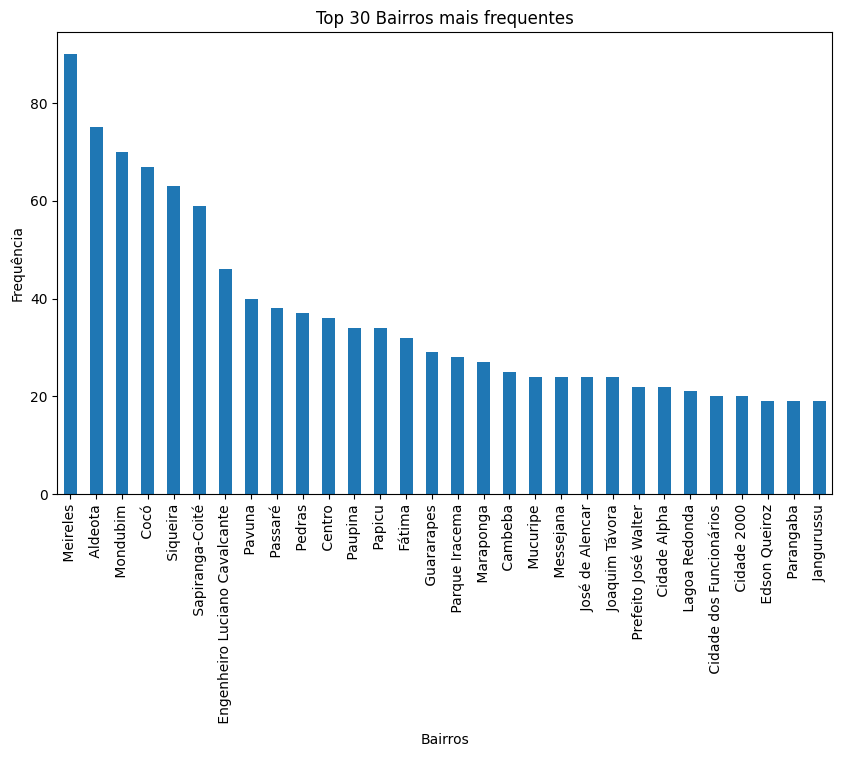

In [34]:
plt.figure(figsize=(10, 6))
top_30_bairros.plot(kind='bar')
plt.xlabel('Bairros')
plt.ylabel('Frequência')
plt.title('Top 30 Bairros mais frequentes')
plt.show()

In [35]:
top_5_cidades = df['CIDADE'].value_counts().head(5)


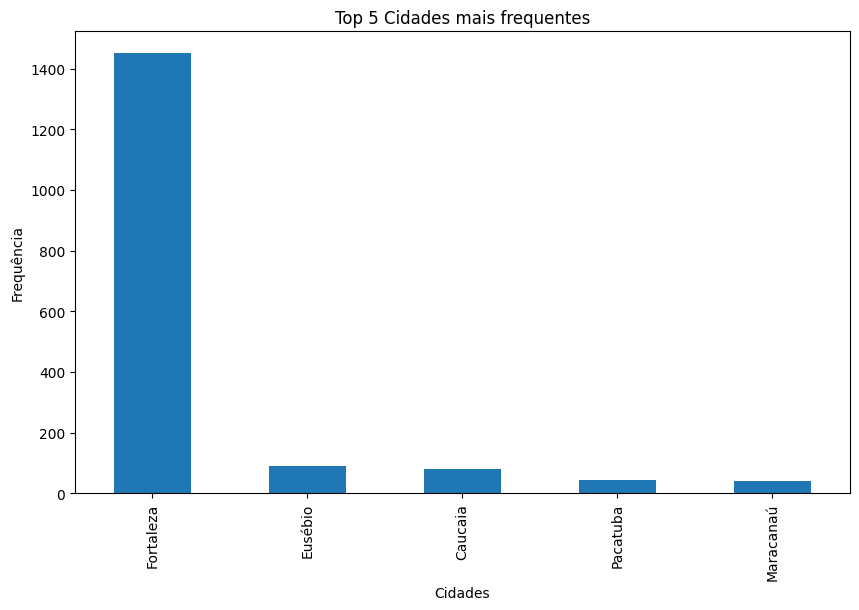

In [36]:
plt.figure(figsize=(10, 6))
top_5_cidades.plot(kind='bar')
plt.xlabel('Cidades')
plt.ylabel('Frequência')
plt.title('Top 5 Cidades mais frequentes')
plt.show()

In [56]:
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    df = df.drop(outliers.index)
    return df

columns = ['ÁREA', 'QUARTOS', 'PREÇO','CONDOMÍNIO', 'IPTU']
for column in columns:
    df = remove_outliers(df, column)

In [57]:
df.describe()

,PREÇO,ÁREA,QUARTOS,BANHEIROS,VAGAS DE GARAGEM,CONDOMÍNIO,IPTU,DATA DA COLETA
count,1574.000000,1572.000000,1582.000000,1400.000000,1530.000000,890.000000,527.000000,1583
mean,324992.057814,78.788804,2.567636,2.187857,1.728105,310.431461,8.848197,2023-05-25 00:00:00
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2023-05-25 00:00:00
25%,145165.750000,52.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2023-05-25 00:00:00
50%,250013.000000,76.000000,3.000000,2.000000,2.000000,280.000000,2.000000,2023-05-25 00:00:00
75%,485000.000000,100.000000,3.000000,3.000000,2.000000,535.000000,20.000000,2023-05-25 00:00:00
max,1000000.000000,192.000000,4.000000,5.000000,5.000000,990.000000,52.000000,2023-05-25 00:00:00
std,246547.731299,41.005704,0.700710,0.966040,0.832975,288.476769,10.148691,NaN


In [58]:
df_clean = df.dropna(subset=['ÁREA', 'PREÇO'])

Text(0, 0.5, 'Preço')

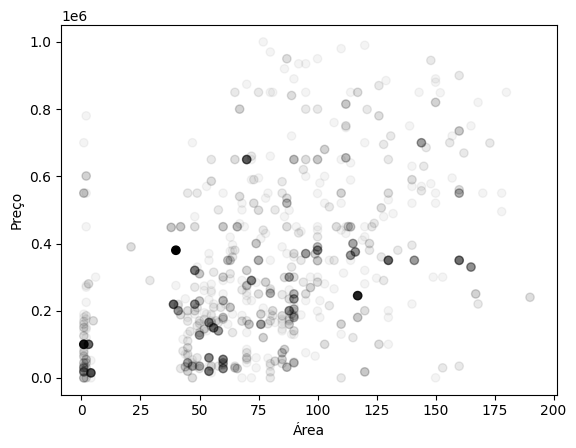

In [59]:
area = df_clean['ÁREA']
preco = df_clean['PREÇO']

hist, xedges, yedges = np.histogram2d(area, preco, bins=50)
counts = hist.flatten()
alpha = (counts - np.min(counts)) / (np.max(counts) - np.min(counts))

plt.scatter(area, preco, color='black', alpha=alpha)
plt.xlabel('Área')
plt.ylabel('Preço')

In [61]:
df_clean = df.dropna(subset=['PREÇO', 'QUARTOS'])

Text(0, 0.5, 'Quartos')

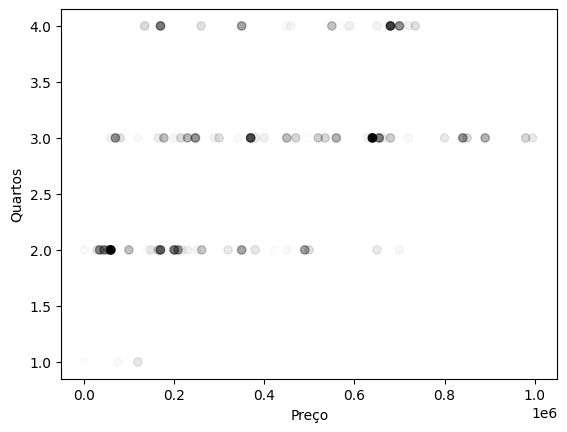

In [62]:
preco = df_clean['PREÇO']
quartos = df_clean['QUARTOS']

hist, xedges, yedges = np.histogram2d(preco, quartos, bins=50)
counts = hist.flatten()
alpha = (counts - np.min(counts)) / (np.max(counts) - np.min(counts))

plt.scatter(preco, quartos, color='black', alpha=alpha)
plt.xlabel('Preço')
plt.ylabel('Quartos')

In [63]:
df_clean = df.dropna(subset=['PREÇO', 'IPTU'])

Text(0, 0.5, 'IPTU')

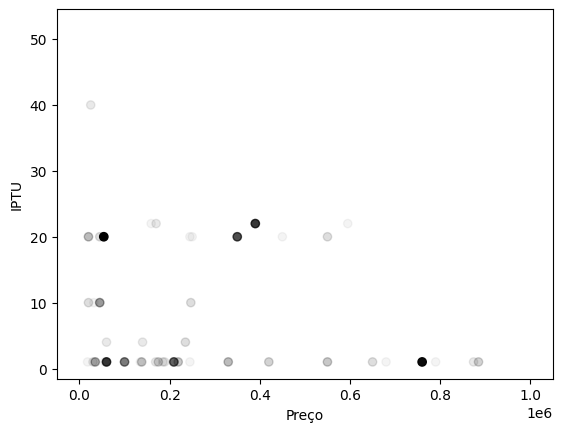

In [64]:
preco = df_clean['PREÇO']
iptu = df_clean['IPTU']

hist, xedges, yedges = np.histogram2d(preco, iptu, bins=50)
counts = hist.flatten()
alpha = (counts - np.min(counts)) / (np.max(counts) - np.min(counts))

plt.scatter(preco, iptu, color='black', alpha=alpha)
plt.xlabel('Preço')
plt.ylabel('IPTU')

In [65]:
df_clean = df.dropna(subset=['ÁREA', 'QUARTOS'])

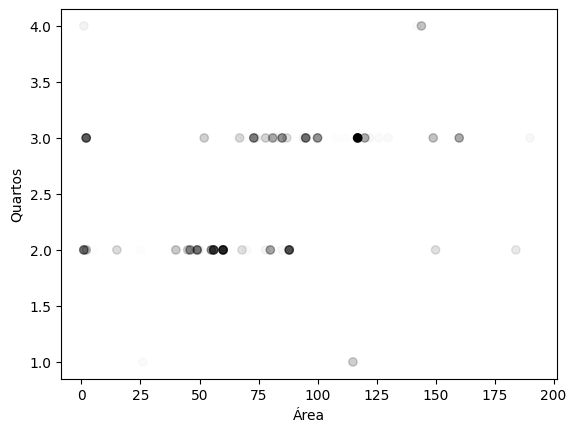

In [66]:
area = df_clean['ÁREA']
quarto = df_clean['QUARTOS']

hist, xedges, yedges = np.histogram2d(area, quarto, bins=50)
counts = hist.flatten()

alpha = (counts - np.min(counts)) / (np.max(counts) - np.min(counts))

plt.scatter(area, quarto, color='black', alpha=alpha)
plt.xlabel('Área')
plt.ylabel('Quartos')

plt.show()

In [67]:
df_clean = df.dropna(subset=['ÁREA', 'VAGAS DE GARAGEM'])

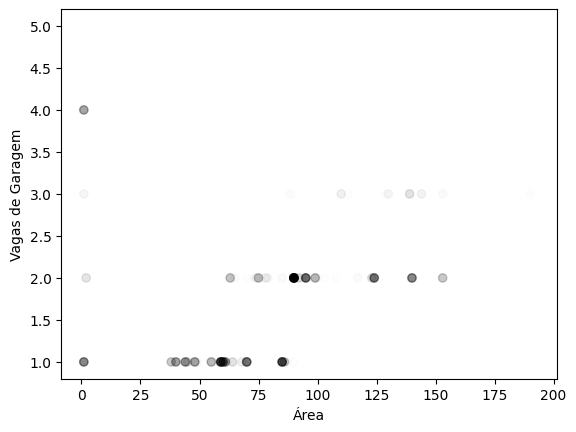

In [68]:
area = df_clean['ÁREA']
vagas = df_clean['VAGAS DE GARAGEM']

hist, xedges, yedges = np.histogram2d(area,vagas, bins=50)
counts = hist.flatten()

alpha = (counts - np.min(counts)) / (np.max(counts) - np.min(counts))

plt.scatter(area, vagas, color='black', alpha=alpha)
plt.xlabel('Área')
plt.ylabel('Vagas de Garagem')

plt.show()

In [70]:
df_clean = df.dropna(subset=['QUARTOS', 'BANHEIROS'])

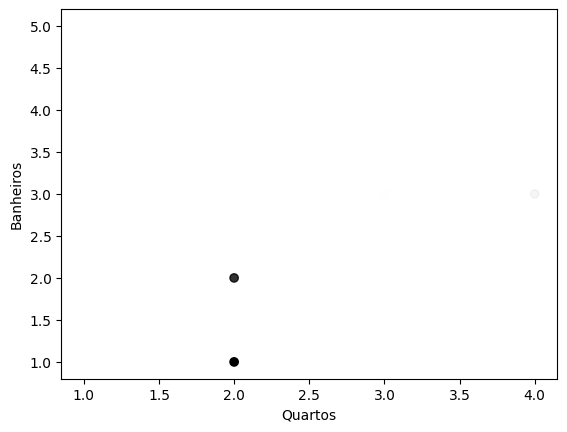

In [71]:
quartos = df_clean['QUARTOS']
banheiros = df_clean['BANHEIROS']

hist, xedges, yedges = np.histogram2d(quartos, banheiros, bins=50)
counts = hist.flatten()

alpha = (counts - np.min(counts)) / (np.max(counts) - np.min(counts))

plt.scatter(quartos, banheiros, color='black', alpha=alpha)
plt.xlabel('Quartos')
plt.ylabel('Banheiros')

plt.show()

In [72]:
df_clean = df.dropna(subset=['ÁREA', 'IPTU'])

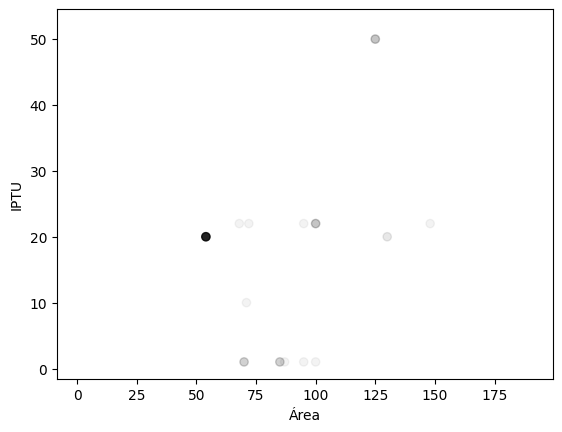

In [73]:
area = df_clean['ÁREA']
iptu = df_clean['IPTU']

hist, xedges, yedges = np.histogram2d(area, iptu, bins=50)
counts = hist.flatten()

alpha = (counts - np.min(counts)) / (np.max(counts) - np.min(counts))

plt.scatter(area, iptu, color='black', alpha=alpha)
plt.xlabel('Área')
plt.ylabel('IPTU')

plt.show()

In [74]:
df_clean = df.dropna(subset=['ÁREA', 'CONDOMÍNIO'])

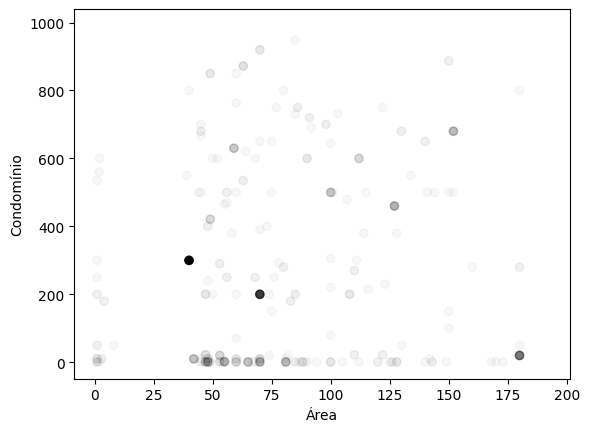

In [88]:
area = df_clean['ÁREA']
condominio = df_clean['CONDOMÍNIO']

hist, xedges, yedges = np.histogram2d(area, condominio, bins=50)
counts = hist.flatten()

alpha = (counts - np.min(counts)) / (np.max(counts) - np.min(counts))

plt.scatter(area, condominio, color='black', alpha=alpha)
plt.xlabel('Área')
plt.ylabel('Condomínio')

plt.show()

<Axes: >

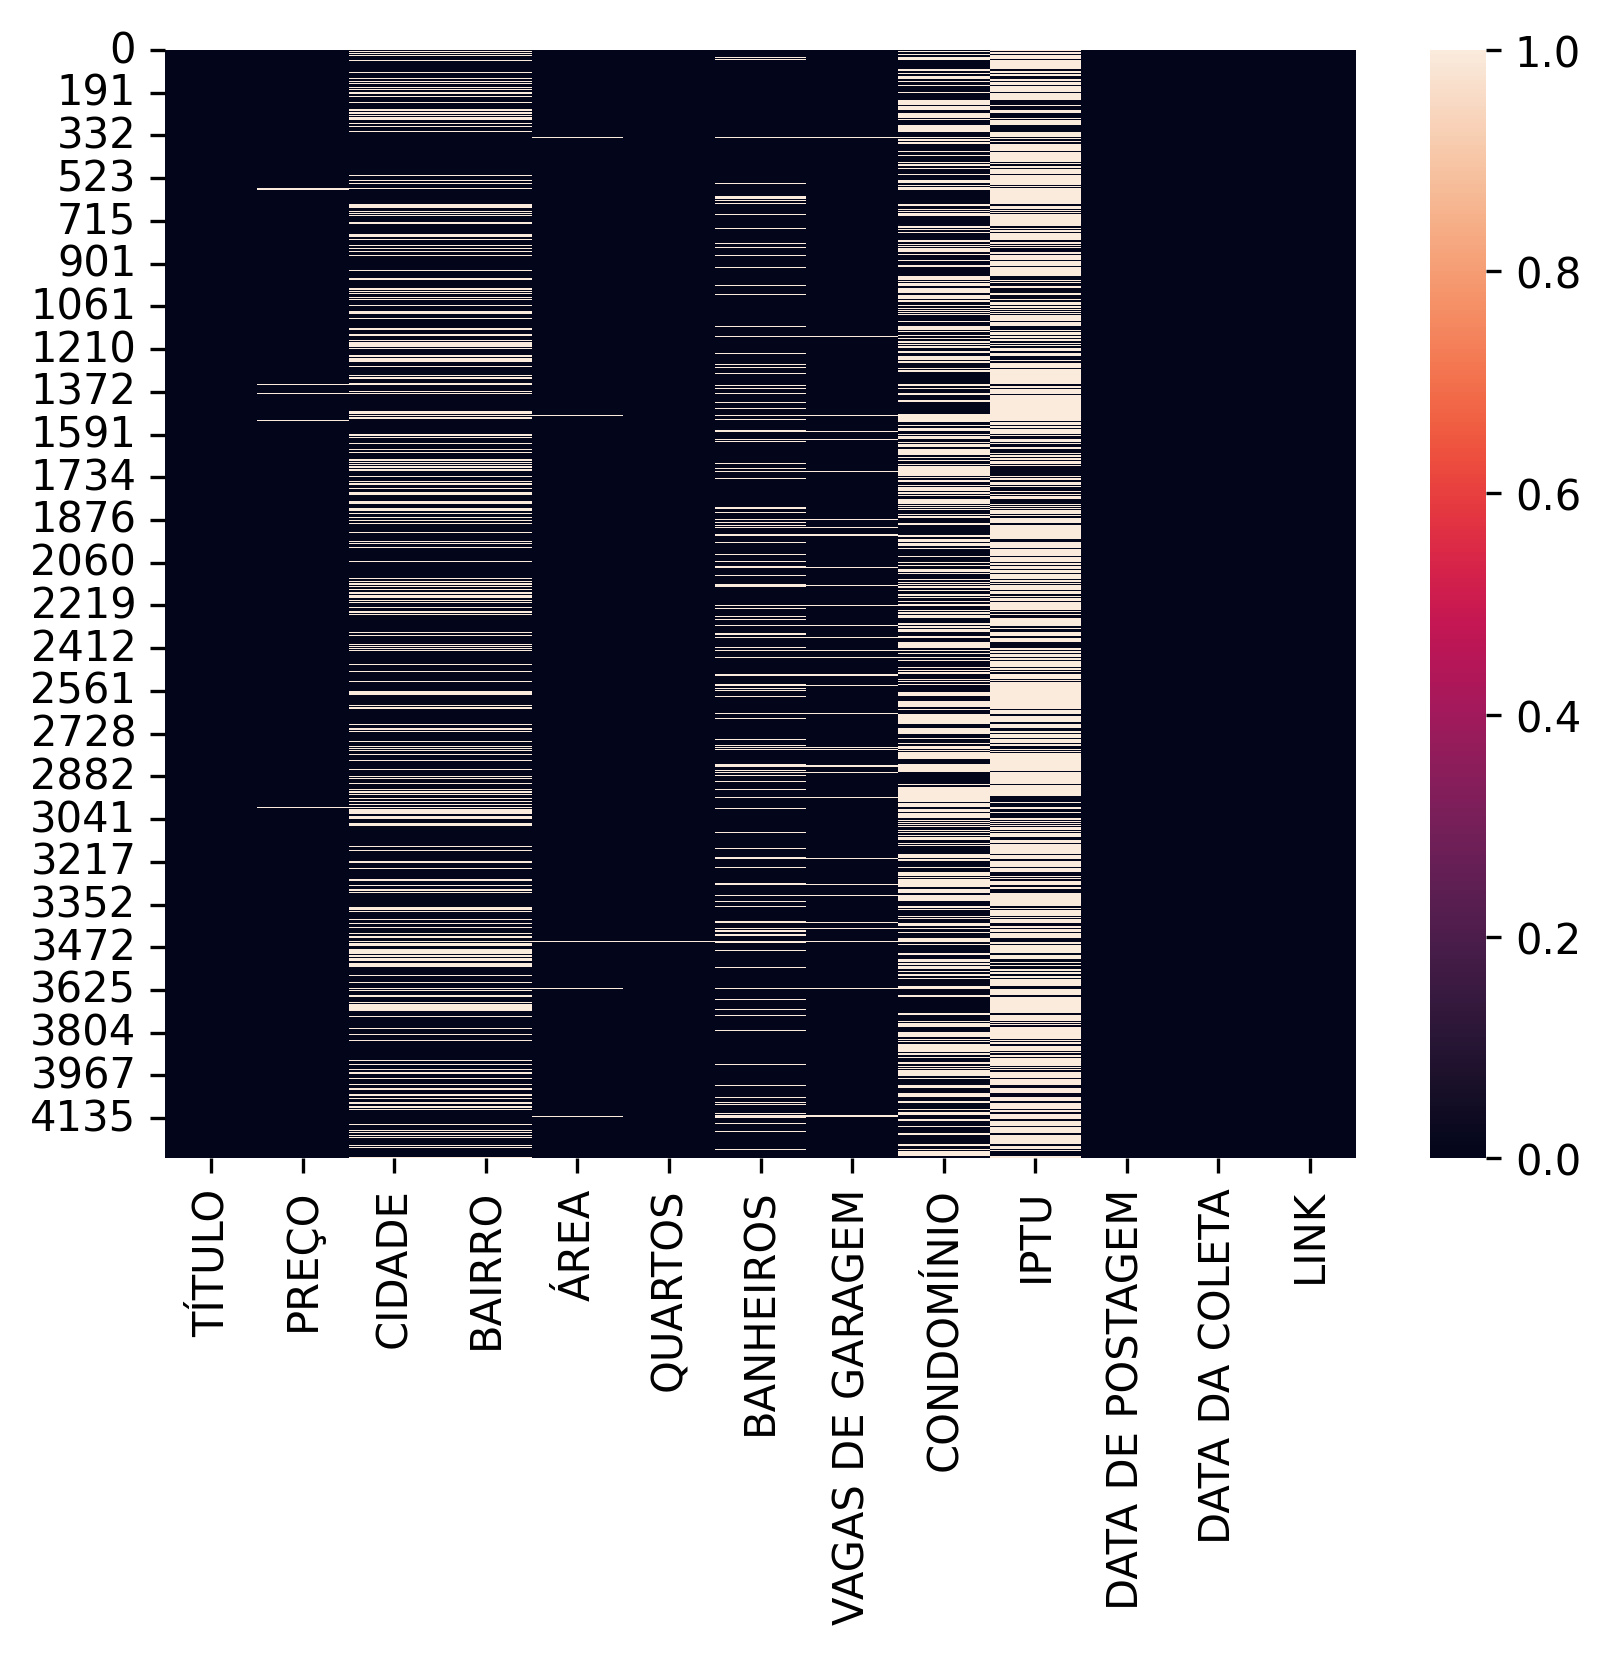

In [79]:
plt.figure(dpi=300)
sns.heatmap(df.isna())

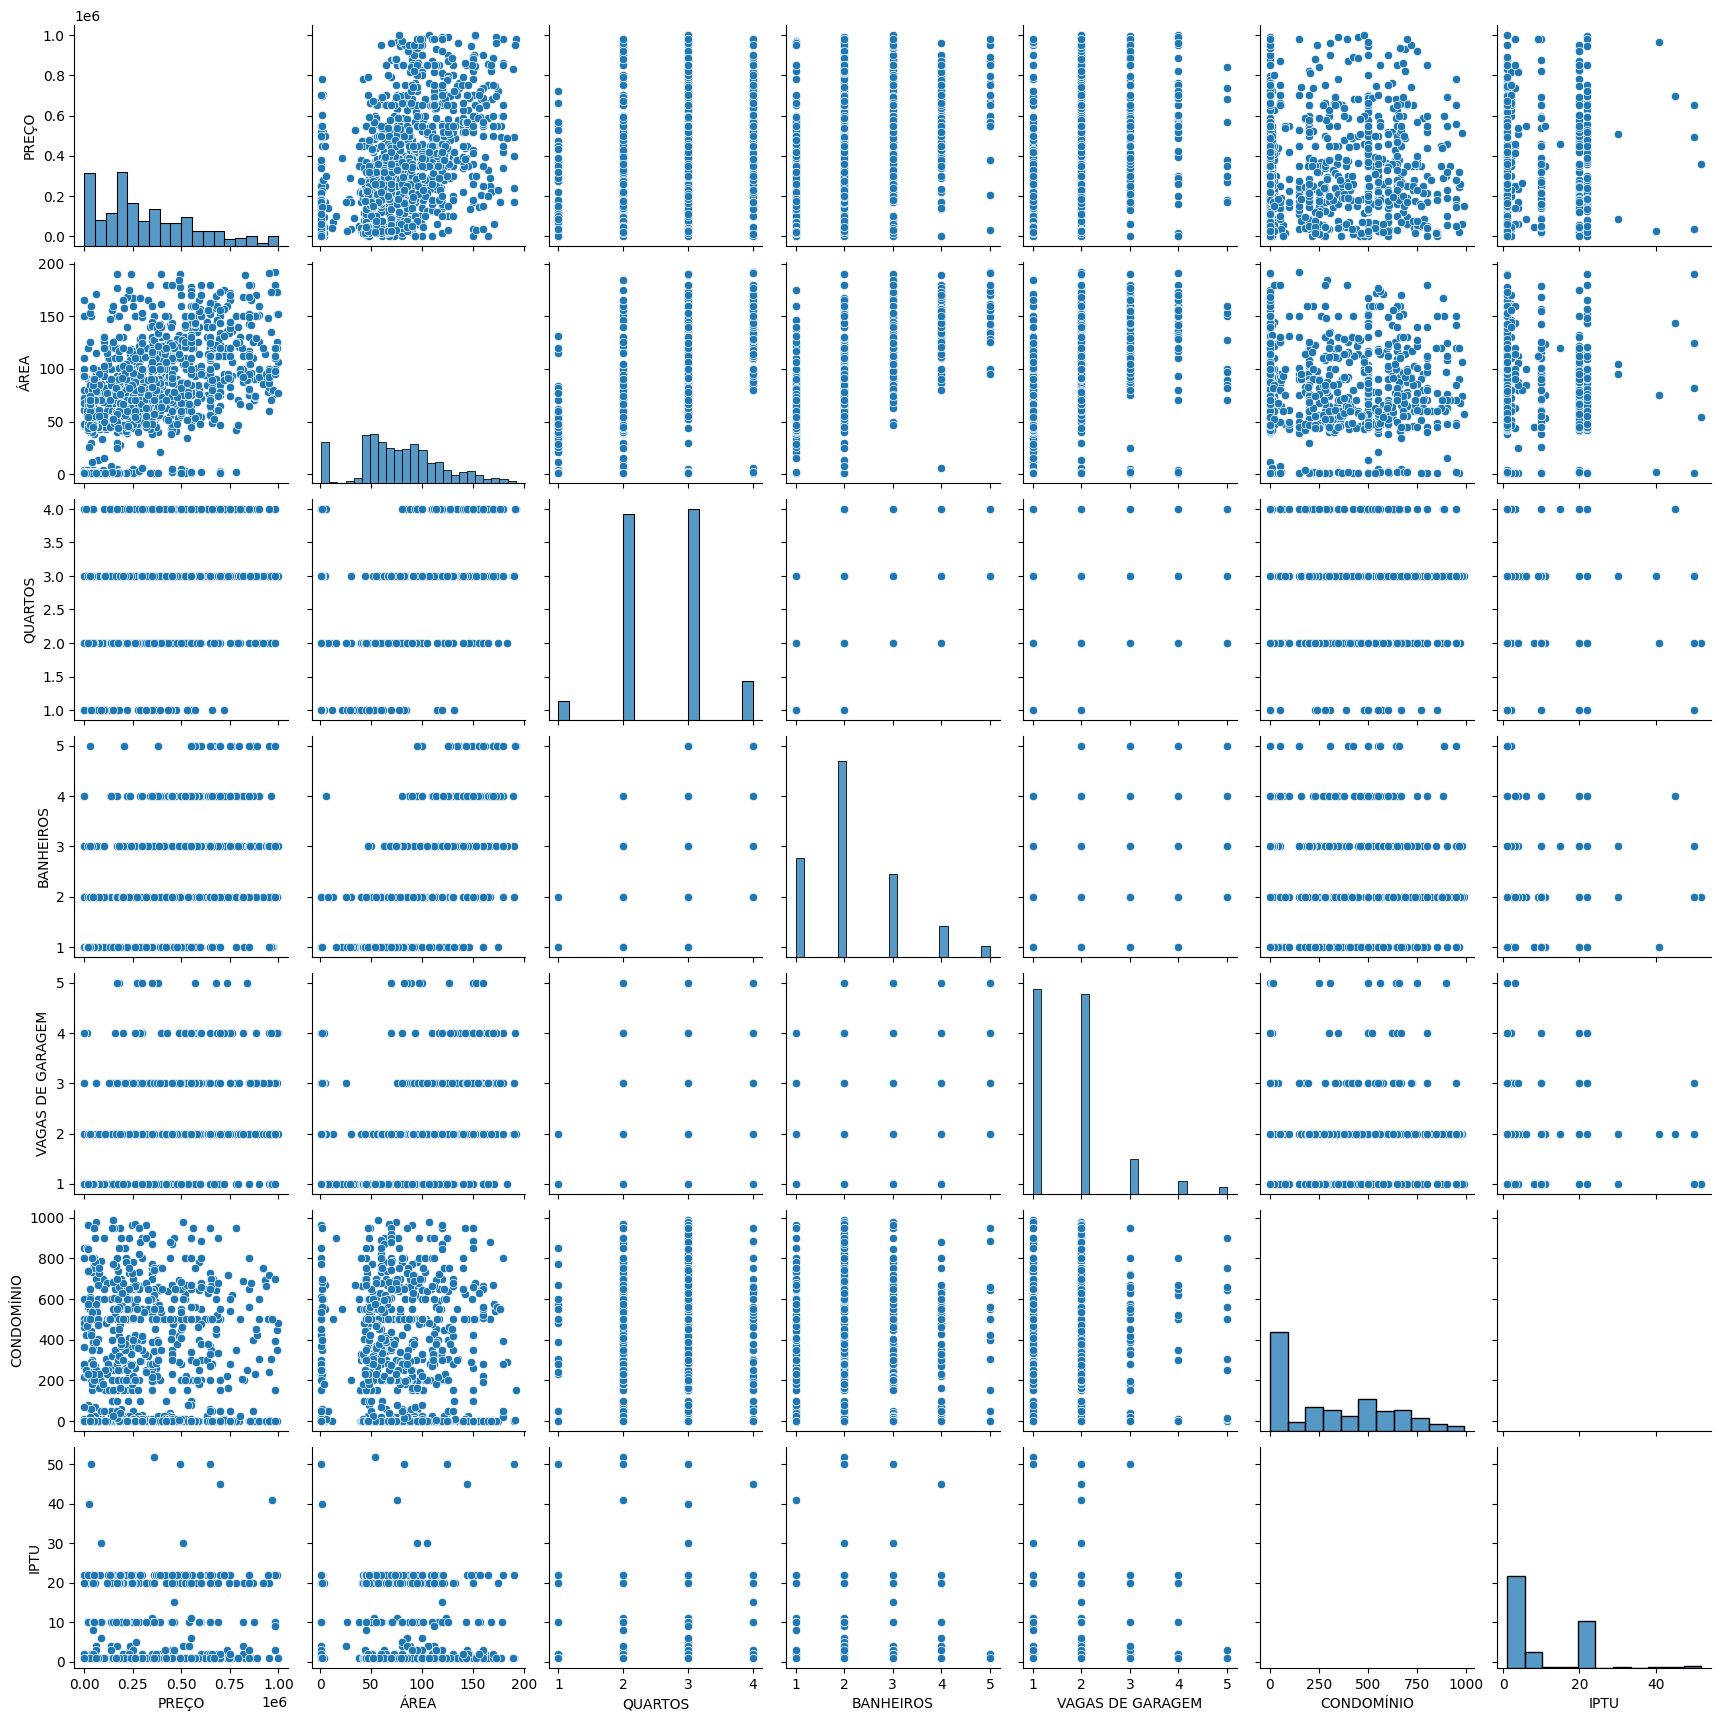

In [80]:
sns.pairplot(df)

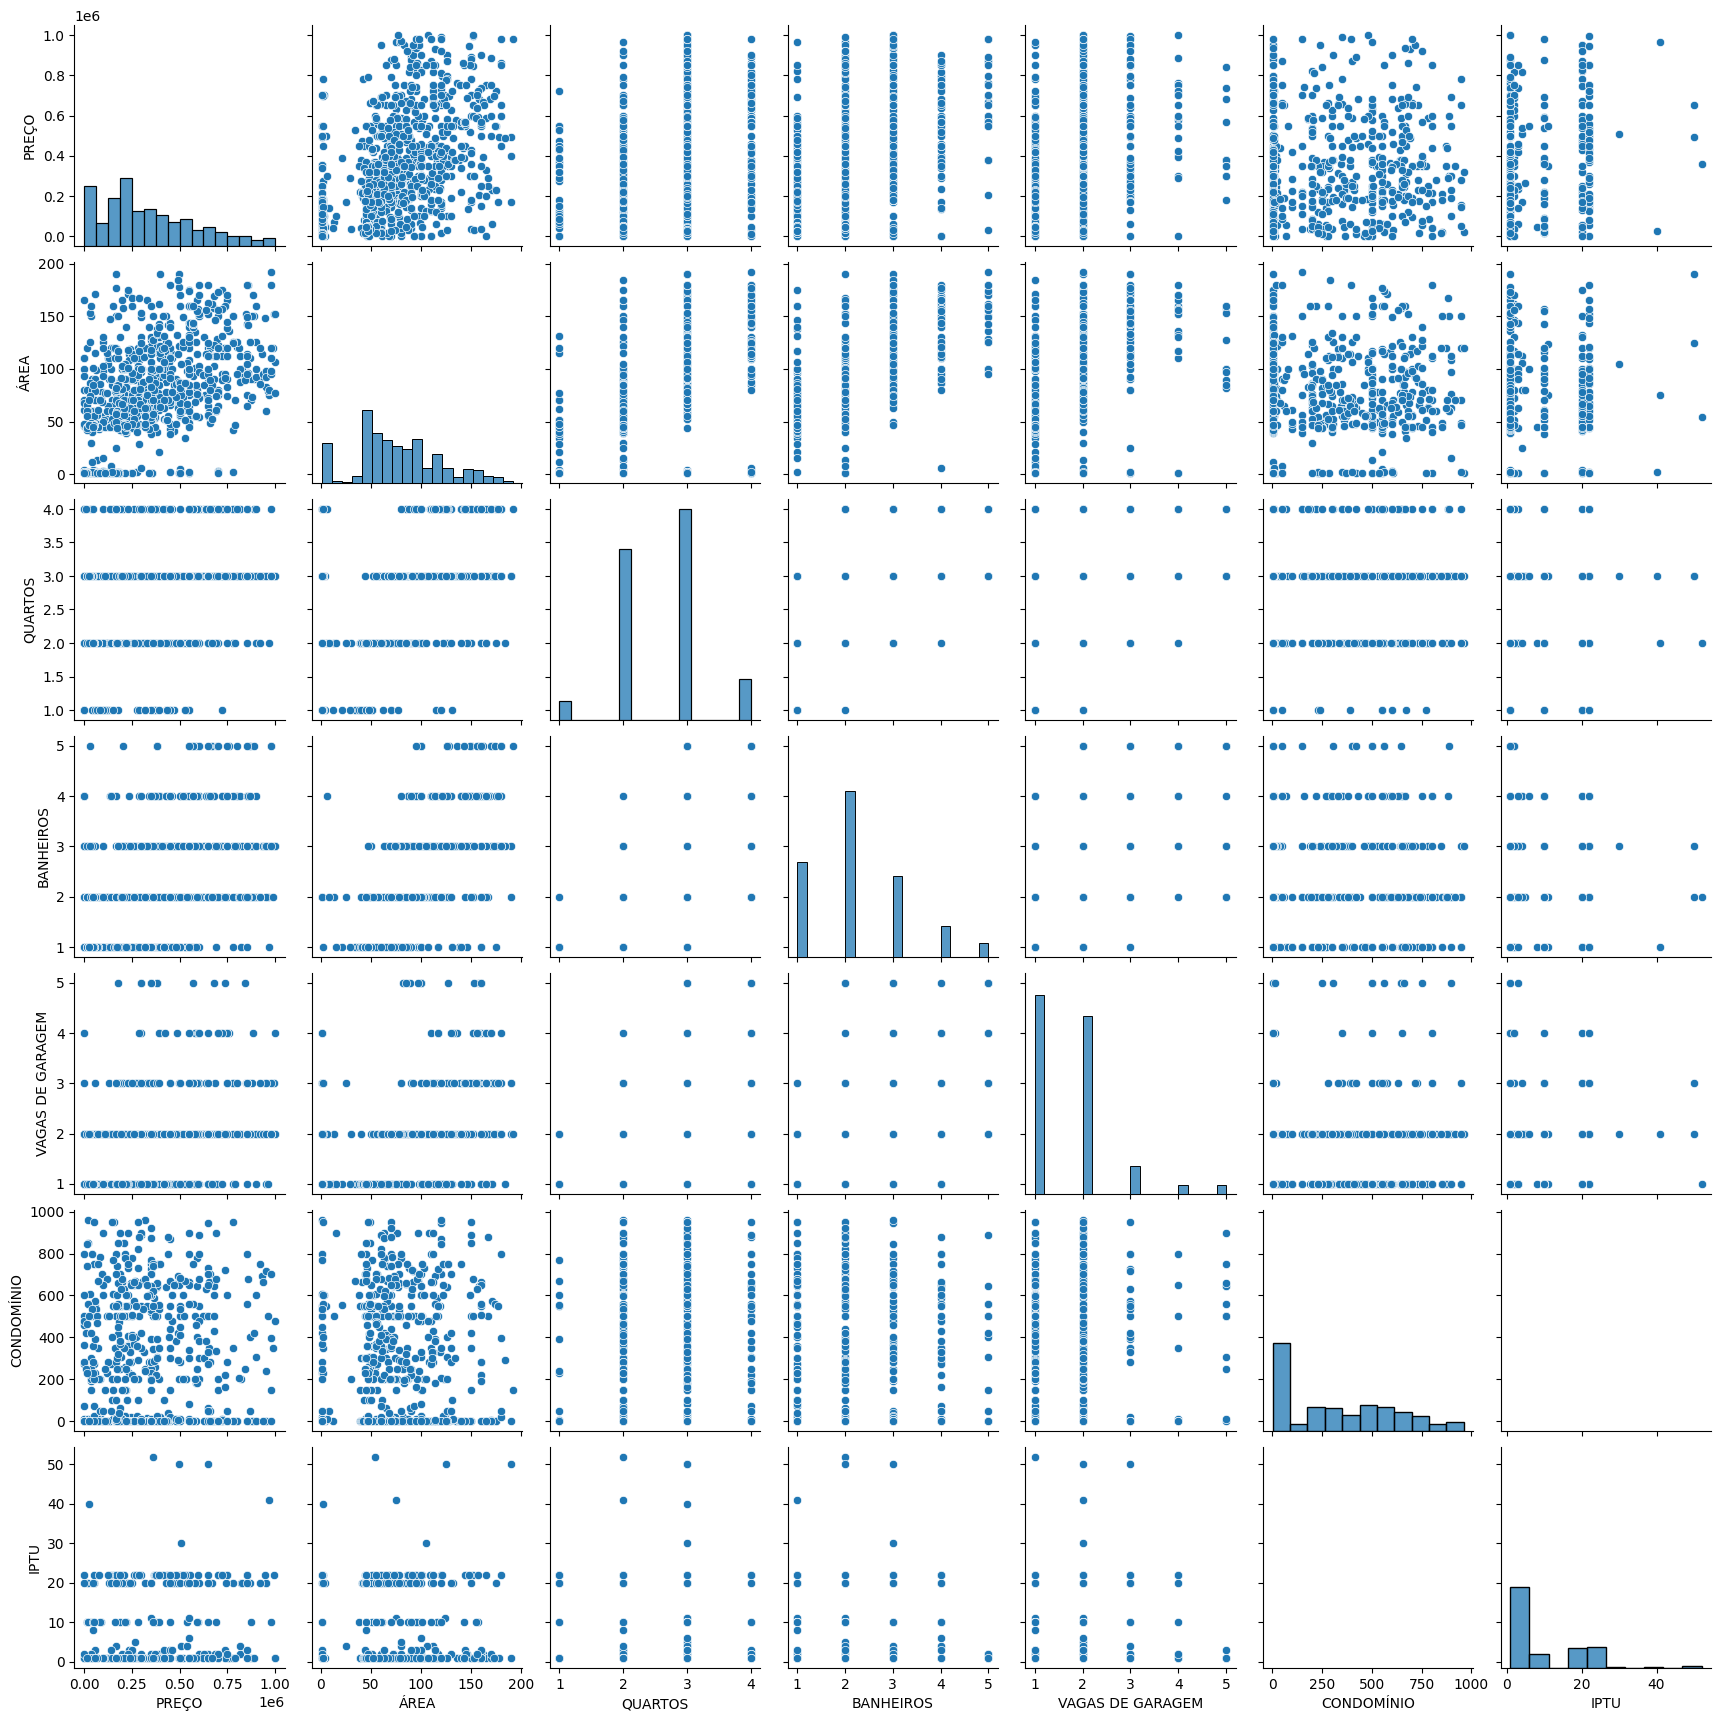

In [84]:
sns.pairplot(df[(df.CIDADE=='Fortaleza')])

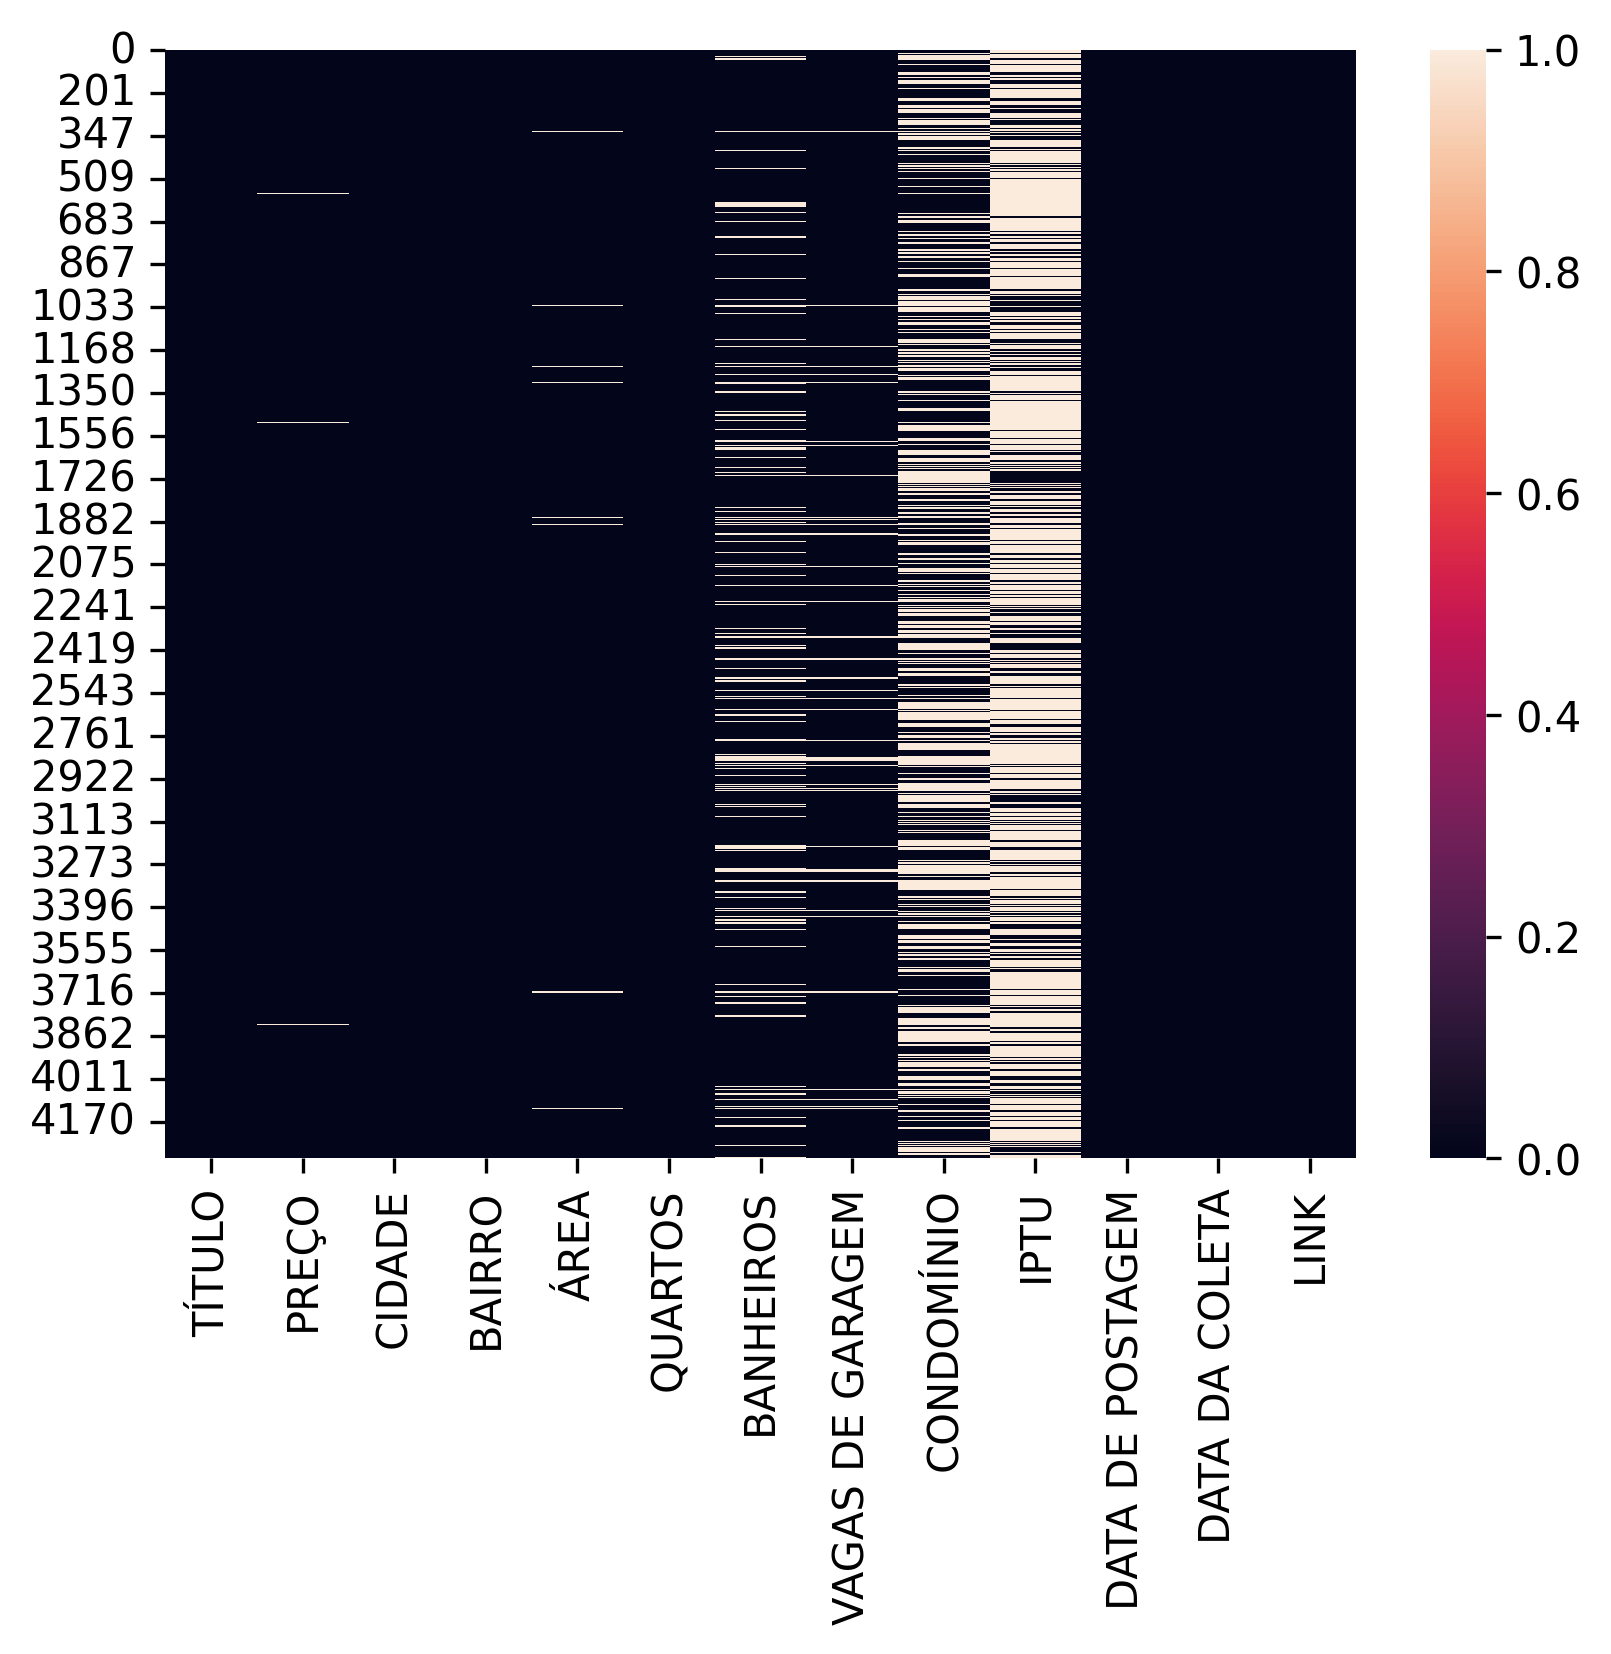

In [86]:
plt.figure(dpi=300)

filtered_df = df[df.CIDADE == 'Fortaleza']
sns.heatmap(filtered_df.isna())

plt.show()

In [91]:
df_clean = df.dropna(subset=['ÁREA', 'CONDOMÍNIO'])
df_fortaleza = df_clean[df_clean['CIDADE'] == 'Fortaleza']

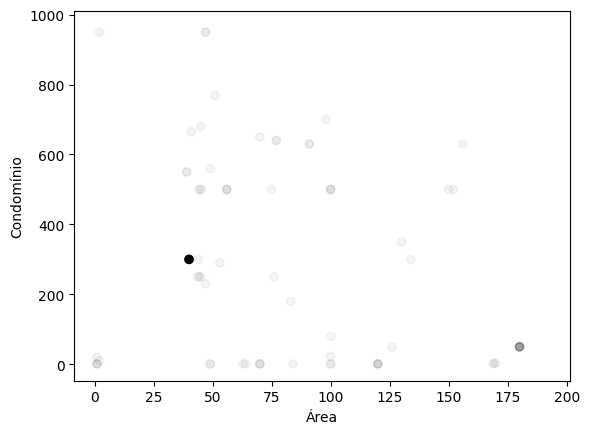

In [92]:
area = df_fortaleza['ÁREA']
condominio = df_fortaleza['CONDOMÍNIO']

hist, xedges, yedges = np.histogram2d(area, condominio, bins=50)
counts = hist.flatten()

alpha = (counts - np.min(counts)) / (np.max(counts) - np.min(counts))

plt.scatter(area, condominio, color='black', alpha=alpha)
plt.xlabel('Área')
plt.ylabel('Condomínio')

plt.show()

In [95]:
df_clean = df.dropna(subset=['ÁREA', 'IPTU'])
df_fortaleza = df_clean[df_clean['CIDADE'] == 'Fortaleza']

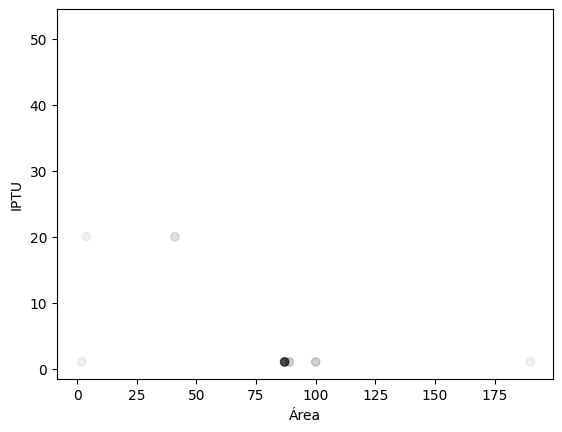

In [96]:
area = df_fortaleza['ÁREA']
iptu = df_fortaleza['IPTU']

hist, xedges, yedges = np.histogram2d(area, iptu, bins=50)
counts = hist.flatten()

alpha = (counts - np.min(counts)) / (np.max(counts) - np.min(counts))

plt.scatter(area, iptu, color='black', alpha=alpha)
plt.xlabel('Área')
plt.ylabel('IPTU')

plt.show()

In [102]:
df_clean = df.dropna(subset=['QUARTOS', 'BANHEIROS'])
df_fortaleza = df_clean[df_clean['CIDADE'] == 'Fortaleza']

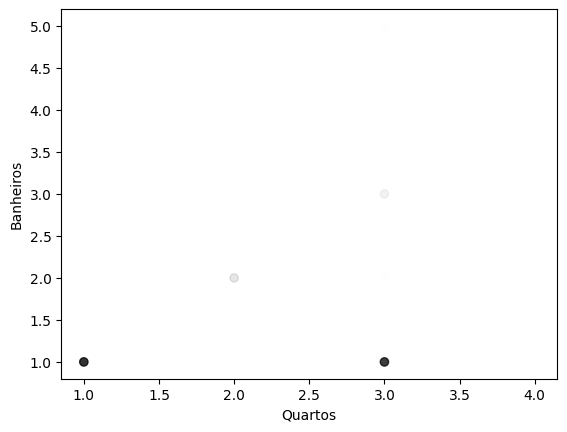

In [103]:
quartos = df_fortaleza['QUARTOS']
banheiros = df_fortaleza['BANHEIROS']

hist, xedges, yedges = np.histogram2d(quartos, banheiros, bins=50)
counts = hist.flatten()

alpha = (counts - np.min(counts)) / (np.max(counts) - np.min(counts))

plt.scatter(quartos, banheiros, color='black', alpha=alpha)
plt.xlabel('Quartos')
plt.ylabel('Banheiros')

plt.show()

In [107]:
df_clean = df.dropna(subset=['ÁREA', 'VAGAS DE GARAGEM'])
df_fortaleza = df_clean[df_clean['CIDADE'] == 'Fortaleza']

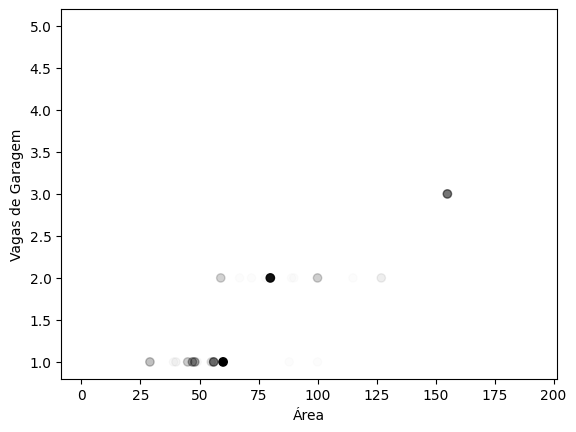

In [108]:
area = df_fortaleza['ÁREA']
vagas = df_fortaleza['VAGAS DE GARAGEM']

hist, xedges, yedges = np.histogram2d(area, vagas, bins=50)
counts = hist.flatten()

alpha = (counts - np.min(counts)) / (np.max(counts) - np.min(counts))

plt.scatter(area, vagas, color='black', alpha=alpha)
plt.xlabel('Área')
plt.ylabel('Vagas de Garagem')

plt.show()

In [110]:
df_clean = df.dropna(subset=['ÁREA', 'QUARTOS'])
df_fortaleza = df_clean[df_clean['CIDADE'] == 'Fortaleza']

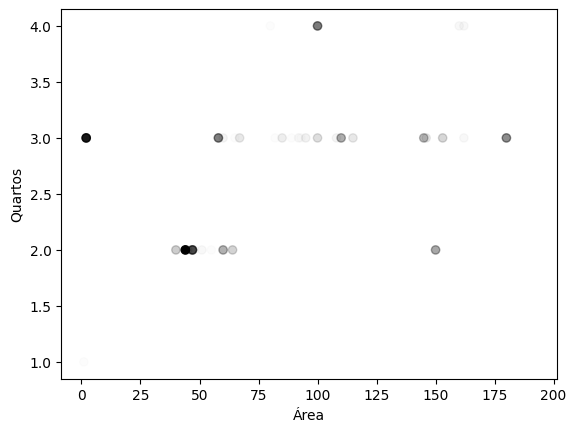

In [111]:
area = df_fortaleza['ÁREA']
quartos = df_fortaleza['QUARTOS']

hist, xedges, yedges = np.histogram2d(area, quartos, bins=50)
counts = hist.flatten()

alpha = (counts - np.min(counts)) / (np.max(counts) - np.min(counts))

plt.scatter(area, quartos, color='black', alpha=alpha)
plt.xlabel('Área')
plt.ylabel('Quartos')

plt.show()

In [115]:
df_clean = df.dropna(subset=['PREÇO', 'IPTU'])
df_fortaleza = df_clean[df_clean['CIDADE'] == 'Fortaleza']

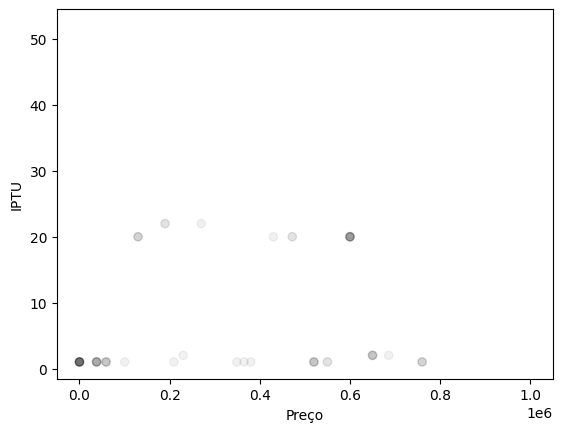

In [116]:
preco = df_fortaleza['PREÇO']
iptu = df_fortaleza['IPTU']

hist, xedges, yedges = np.histogram2d(preco, iptu, bins=50)
counts = hist.flatten()

alpha = (counts - np.min(counts)) / (np.max(counts) - np.min(counts))

plt.scatter(preco, iptu, color='black', alpha=alpha)
plt.xlabel('Preço')
plt.ylabel('IPTU')

plt.show()

In [117]:
df_clean = df.dropna(subset=['PREÇO', 'QUARTOS'])
df_fortaleza = df_clean[df_clean['CIDADE'] == 'Fortaleza']

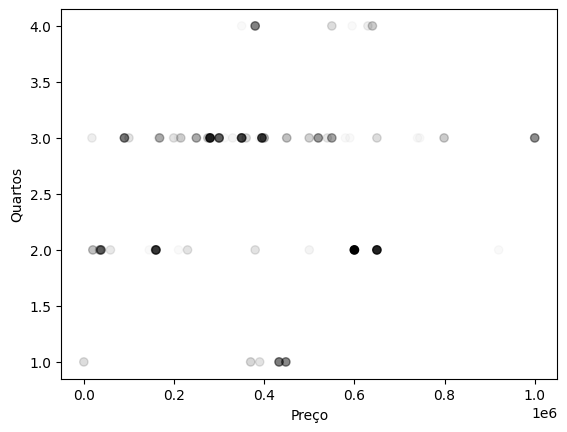

In [118]:
preco = df_fortaleza['PREÇO']
quarto = df_fortaleza['QUARTOS']

hist, xedges, yedges = np.histogram2d(preco, quarto, bins=50)
counts = hist.flatten()

alpha = (counts - np.min(counts)) / (np.max(counts) - np.min(counts))

plt.scatter(preco, quarto, color='black', alpha=alpha)
plt.xlabel('Preço')
plt.ylabel('Quartos')

plt.show()

In [119]:
df_clean = df.dropna(subset=['PREÇO', 'ÁREA'])
df_fortaleza = df_clean[df_clean['CIDADE'] == 'Fortaleza']

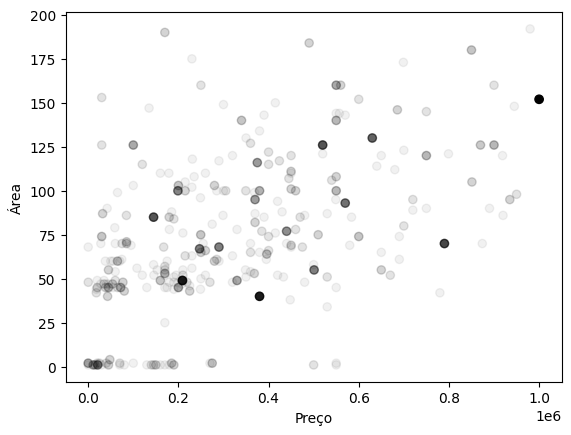

In [120]:
preco = df_fortaleza['PREÇO']
area = df_fortaleza['ÁREA']

hist, xedges, yedges = np.histogram2d(preco, area, bins=50)
counts = hist.flatten()

alpha = (counts - np.min(counts)) / (np.max(counts) - np.min(counts))

plt.scatter(preco, area, color='black', alpha=alpha)
plt.xlabel('Preço')
plt.ylabel('Área')

plt.show()

In [122]:
df_fortaleza = df[df['CIDADE'] == 'Fortaleza']
top_30_bairros_fortaleza = df_fortaleza['BAIRRO'].value_counts().nlargest(30)

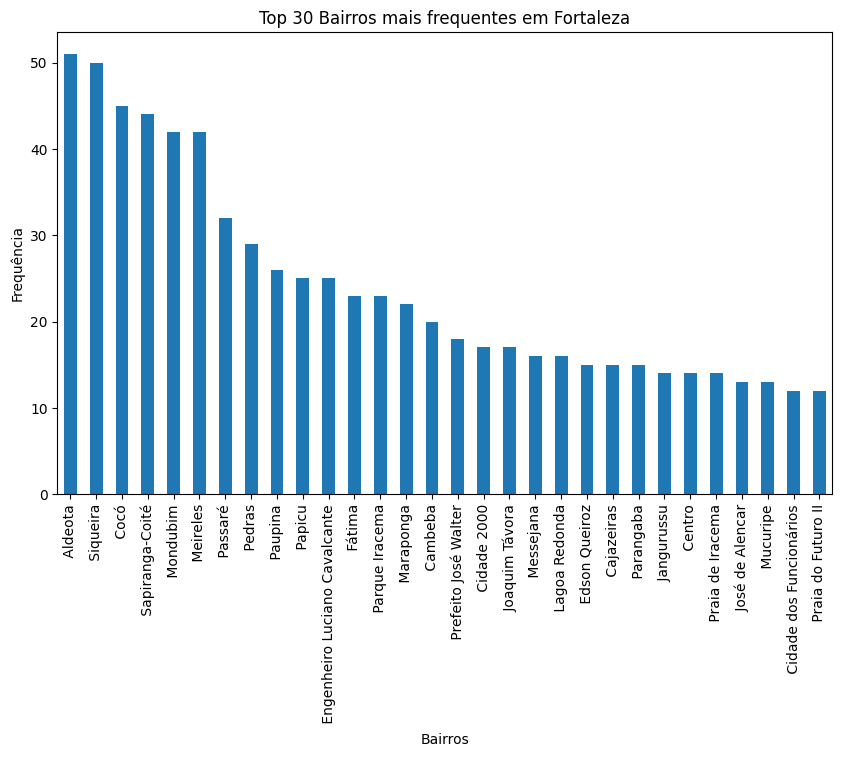

In [123]:
plt.figure(figsize=(10, 6))
top_30_bairros_fortaleza.plot(kind='bar')
plt.xlabel('Bairros')
plt.ylabel('Frequência')
plt.title('Top 30 Bairros mais frequentes em Fortaleza')

plt.show()

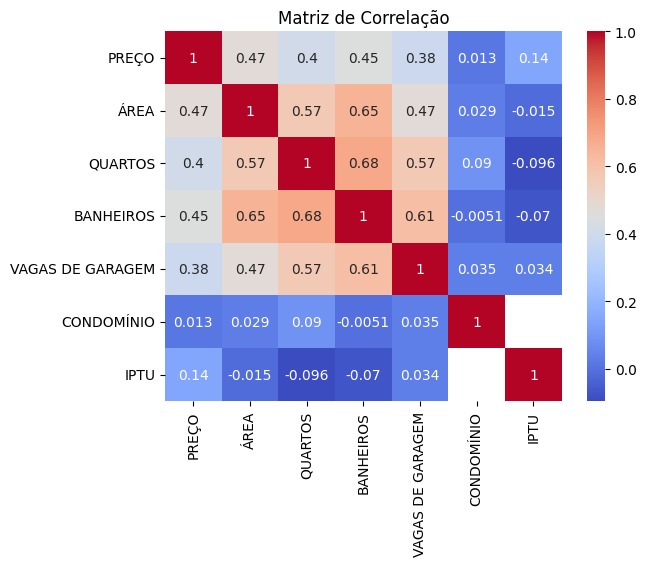

In [124]:
filtro = df['CIDADE'] == 'Fortaleza'
df_filtrado = df.loc[filtro, :]
df=df_filtrado
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [121]:
df_fortaleza = df[df['CIDADE'] == 'Fortaleza']
df_fortaleza.describe()

,PREÇO,ÁREA,QUARTOS,BANHEIROS,VAGAS DE GARAGEM,CONDOMÍNIO,IPTU,DATA DA COLETA
count,1006.000000,1001.000000,1009.000000,884.000000,966.000000,584.000000,314.000000,1009
mean,342611.661034,77.727273,2.617443,2.233032,1.699793,323.948630,8.764331,2023-05-24 23:59:59.999999744
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2023-05-25 00:00:00
25%,170000.000000,49.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2023-05-25 00:00:00
50%,289991.000000,72.000000,3.000000,2.000000,2.000000,296.500000,2.000000,2023-05-25 00:00:00
75%,500000.000000,100.000000,3.000000,3.000000,2.000000,550.000000,20.000000,2023-05-25 00:00:00
max,1000000.000000,192.000000,4.000000,5.000000,5.000000,962.000000,52.000000,2023-05-25 00:00:00
std,245533.722880,42.183629,0.712928,1.027369,0.848614,287.594621,10.132755,NaN
